<h1 style="font-size: 50px; text-align: center; color:white; background-color:red; padding:25px">Food delivery startup recovery</h1>

<p><b>All data is taken from <a href="https://codebasics.io/challenges/codebasics-resume-project-challenge/23">Code Basics</a> </b></p>

## Data Exploration

We have 8 datasets

- **dim_customer.csv :** It contains 4 columns : 'customer_id', 'signup_date', 'city' and 'acquisition_channel' (how company got customer)

- **dim_delivery_partner_.csv :** Contains details about the delivery partners.
delivery_partner_id: Unique identifier for each delivery partner.
partner_name: Name of the delivery partner (e.g., Zomato, Swiggy).
city: City where the delivery partner operates (e.g., Mumbai, Bengaluru).
vehicle_type: Type of vehicle used for deliveries (e.g., Bike, Scooter, Cycle).
employment: Employment status of the partner (e.g., Full-time, Part-time, Contract).
avg_rating: Average customer rating for the delivery partner (scale of 1 to 5).
is_active:Indicates whether the delivery partner is currently active (Yes/No).

- **dim_menu_item.csv :** Contains details about menu items offered by restaurants.
menu_item_id: Unique identifier for each menu item.
restaurant_id: Links to dim_restaurant.
item_name: Name of the item (e.g., Veg Biryani, Margherita Pizza).
category: Category of the item (e.g., Starter, Main Course).
is_veg: Indicates if the item is vegetarian (Yes/No).
price: Price of the menu item.

- **dim_restaurant.csv :** Contains information about the restaurants involved with QuickBite.
restaurant_id: Unique identifier for each restaurant.
restaurant_name: Name of the restaurant.
city : City where the restaurant operates (e.g., Mumbai, Bengaluru).
cusini_type: Type of cuisine offered by the restaurant (e.g., Indian, Italian, Chinese).
partner_type: Type of partnership with QuickBite (e.g., Third-party, In-house).
avg_prep_time: Average preparation time for orders (in minutes) (e.g., 20 minutes, 30 minutes).
is_active: Indicates whether the restaurant is currently active on the platform (Yes/No).

- **fact_delivery_performance.csv :** Tracks delivery performance metrics like delivery times and distance.
order_id: Links to fact_orders.
actual_delivery_time_mins: Actual delivery time in minutes.
expected_delivery_time_mins: Expected delivery time based on SLA.
distance_km: Distance traveled by the delivery partner (in km).

- **fact_order_items.csv :** Tracks individual items in each order.
order_id: Links to fact_orders.
item_id: Foreign key linking to the dim_menu_item table, representing the item ordered.
menu_item_id: ID linking to the menu items table.
restaurant_id:
quantity: Quantity of the item ordered.
unit_price: Price per unit of the item.
item_discount: Discount applied to the item.
line_total: Price after applying item discount.

- **fact_orders.csv :** Tracks customer orders, including amounts, timestamps, and cancellation status.
order_id: Unique identifier for each order.
customer_id: ID linking to the customer table.
restaurant_id: ID linking to the restaurant table.
delivery_partner_id: ID linking to the delivery partner table.
order_timestamp: Timestamp of when the order was placed.
subtotal_amount: Total cost before discounts.
discount_amount: Applied discounts.
delivery_fee: Fee charged for delivery.
total_amount: Final order amount.
is_cod: Whether the order is Cash on Delivery (Y/N).
is_cancelled: Whether the order was cancelled (Y/N).

- **fact_ratings.csv :** Contains ratings and review data provided by customers for each order.
order_id: Links to fact_orders.
customer_id: Links to dim_customer.
restaurant_id: Links to dim_restaurant.
rating: Rating given by the customer (e.g., 1–5).
review_text: Text of the review provided by the customer.
review_timestamp: Timestamp of when the review was posted.
sentiment_score: Sentiment score calculated based on review text (e.g., -1 to +1).

In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading all the datasets
dim_customers = pd.read_csv("./RPC_18_Datasets/dim_customer.csv")
dim_delivery_partners = pd.read_csv("./RPC_18_Datasets/dim_delivery_partner_.csv")
dim_menu_items = pd.read_csv("./RPC_18_Datasets/dim_menu_item.csv")
dim_restaurants = pd.read_csv("./RPC_18_Datasets/dim_restaurant.csv")
fact_delivery_performance = pd.read_csv("./RPC_18_Datasets/fact_delivery_performance.csv")
fact_order_items = pd.read_csv("./RPC_18_Datasets/fact_order_items.csv")
fact_orders = pd.read_csv("./RPC_18_Datasets/fact_orders.csv")
fact_ratings = pd.read_csv("./RPC_18_Datasets/fact_ratings.csv")

**Seeing the datasets**

In [3]:
dim_customers

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic
...,...,...,...,...
107771,CUST199995,19-11-2024,Delhi,Organic
107772,CUST199996,14-01-2025,Hyderabad,Social
107773,CUST199997,22-12-2024,Hyderabad,Organic
107774,CUST199999,11-05-2025,Mumbai,Organic


In [4]:
# checking for null values in the dataset
dim_customers.isna().sum()

customer_id            0
signup_date            0
city                   0
acquisition_channel    0
dtype: int64

In [5]:
dim_delivery_partners

,delivery_partner_id,partner_name,city,vehicle_type,employment_type,avg_rating,is_active
0,DP09615,Neha E,Bengaluru,Scooter,Full-time,3.77,Y
1,DP02021,Neha V,Bengaluru,Bike,Full-time,3.90,Y
2,DP05541,Vikas S,Delhi,Cycle,Part-time,3.33,Y
3,DP13859,Amit B,Delhi,Cycle,Part-time,4.07,N
4,DP08091,Arjun R,Mumbai,Car,Full-time,4.63,Y
...,...,...,...,...,...,...,...
14995,DP05518,Neha W,Pune,Bike,Part-time,3.96,N
14996,DP01199,Shreya J,Chennai,Bike,Full-time,4.14,Y
14997,DP07045,Suresh M,Delhi,Bike,Full-time,4.45,Y
14998,DP09075,Vikas H,Chennai,Scooter,Full-time,4.46,Y


In [6]:
# checking for null values
dim_delivery_partners.isna().sum()

delivery_partner_id    0
partner_name           0
city                   0
vehicle_type           0
employment_type        0
avg_rating             0
is_active              0
dtype: int64

In [7]:
dim_menu_items

,menu_item_id,restaurant_id,item_name,category,is_veg,price
0,MENU12962_3216,REST12962,Paneer Tikka Pizza,Pizza,Y,271.05
1,MENU12962_1962,REST12962,Pepperoni Pizza,Pizza,N,327.26
2,MENU14069_0510,REST14069,Egg Fried Rice,Fried Rice,N,200.01
3,MENU14069_4308,REST14069,Paneer Tikka,Starters,Y,198.83
4,MENU08622_7574,REST08622,Kadai Paneer,Curries,Y,271.60
...,...,...,...,...,...,...
342666,MENU18195_3090,REST18195,Lemon Rice,Rice,Y,139.28
342667,MENU18195_7326,REST18195,Idli Sambar,Idli,N,108.10
342668,MENU04104_0153,REST04104,French Fries,Fries,Y,114.54
342669,MENU04104_5636,REST04104,Chicken Kathi Roll,Wraps,N,197.66


In [8]:
# checking for null values
dim_menu_items.isna().sum()

menu_item_id     0
restaurant_id    0
item_name        0
category         0
is_veg           0
price            0
dtype: int64

In [9]:
dim_restaurants

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
...,...,...,...,...,...,...,...
19990,REST09248,Fresh Sweets Clouds,Chennai,South Indian,Restaurant,16-25,Y
19991,REST11150,Thindi Mane Express Zone,Mumbai,Fast Food,Restaurant,<=15,N
19992,REST07315,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
19993,REST16252,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [10]:
# checking for null values
dim_restaurants.isna().sum()

restaurant_id        0
restaurant_name      0
city                 0
cuisine_type         0
partner_type         0
avg_prep_time_min    0
is_active            0
dtype: int64

In [11]:
fact_delivery_performance

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4
...,...,...,...,...
149161,ORD202509003524,72,46,2.2
149162,ORD202509007665,58,38,3.5
149163,ORD202509007687,49,40,6.3
149164,ORD202509002029,50,49,6.8


In [12]:
# checking for null values
fact_delivery_performance.isna().sum()

order_id                       0
actual_delivery_time_mins      0
expected_delivery_time_mins    0
distance_km                    0
dtype: int64

In [13]:
fact_order_items

,order_id,item_id,menu_item_id,restaurant_id,quantity,unit_price,item_discount,line_total
0,ORD202501006518,ITEM001,MENU12962_3216,REST12962,2,48.31,0.00,96.62
1,ORD202501006518,ITEM002,MENU12962_1962,REST12962,3,61.24,0.00,183.71
2,ORD202501019281,ITEM001,MENU14069_0510,REST14069,2,87.19,0.00,174.38
3,ORD202501019281,ITEM002,MENU14069_4308,REST14069,3,84.67,0.00,254.00
4,ORD202501023439,ITEM001,MENU08622_7574,REST08622,2,235.81,35.44,436.18
...,...,...,...,...,...,...,...,...
342989,ORD202509002029,ITEM003,MENU18195_3090,REST18195,1,18.46,2.10,16.36
342990,ORD202509002029,ITEM004,MENU18195_7326,REST18195,3,25.84,8.81,68.72
342991,ORD202509007649,ITEM001,MENU04104_0153,REST04104,2,60.04,16.26,103.83
342992,ORD202509007649,ITEM002,MENU04104_5636,REST04104,1,112.24,15.20,97.04


In [14]:
# checking for null values
fact_order_items.isna().sum()

order_id         0
item_id          0
menu_item_id     0
restaurant_id    0
quantity         0
unit_price       0
item_discount    0
line_total       0
dtype: int64

In [15]:
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N
...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y
149162,ORD202509007665,CUST014106,REST04052,NaN,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N


In [16]:
# checking for null values
fact_orders.isna().sum()

order_id                  0
customer_id               0
restaurant_id             0
delivery_partner_id    5635
order_timestamp           0
subtotal_amount           0
discount_amount           0
delivery_fee              0
total_amount              0
is_cod                    0
is_cancelled              0
dtype: int64

In [17]:
fact_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70
...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45


In [18]:
# checking for null values
fact_ratings.isna().sum()

order_id            0
customer_id         0
restaurant_id       0
rating              0
review_text         0
review_timestamp    0
sentiment_score     0
dtype: int64

In short, we just have to clean : 
- **fact_orders** : 'delivery_partner_id' -> Replace NaN to "ID not mentioned", 'order_timestamp' -> extract month and year
- **fact_ratings** : 'review_timestamp' -> extract month and year

## Data Cleaning

**fact_orders**

In [19]:
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N
...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y
149162,ORD202509007665,CUST014106,REST04052,NaN,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N


In [20]:
# replacing "NaN" with "No delivery partner"
fact_orders["delivery_partner_id"] = fact_orders["delivery_partner_id"].fillna("ID not mentioned")
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N
...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y
149162,ORD202509007665,CUST014106,REST04052,ID not mentioned,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N


In [21]:
# seeing all "No delivery partner" records
fact_orders[fact_orders["delivery_partner_id"] == "ID not mentioned"]

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
15,ORD202501011873,CUST050526,REST19508,ID not mentioned,2025-01-01 12:10:00,0.0,0.0,0.0,0.0,N,Y
24,ORD202501022002,CUST114265,REST08397,ID not mentioned,2025-01-01 12:15:00,0.0,0.0,0.0,0.0,N,Y
50,ORD202501012168,CUST119646,REST12616,ID not mentioned,2025-01-01 12:29:00,0.0,0.0,0.0,0.0,N,Y
54,ORD202501023485,CUST056936,REST03176,ID not mentioned,2025-01-01 12:32:00,0.0,0.0,0.0,0.0,N,Y
57,ORD202501000523,CUST195834,REST10055,ID not mentioned,2025-01-01 12:33:00,0.0,0.0,0.0,0.0,N,Y
...,...,...,...,...,...,...,...,...,...,...,...
149097,ORD202509001260,CUST150817,REST07214,ID not mentioned,2025-09-30 20:56:00,0.0,0.0,0.0,0.0,N,Y
149110,ORD202509009077,CUST024731,REST10666,ID not mentioned,2025-09-30 21:11:00,0.0,0.0,0.0,0.0,N,Y
149146,ORD202509005099,CUST040380,REST14432,ID not mentioned,2025-09-30 22:19:00,0.0,0.0,0.0,0.0,Y,Y
149156,ORD202509003738,CUST147227,REST05675,ID not mentioned,2025-09-30 22:38:00,0.0,0.0,0.0,0.0,Y,Y


In [22]:
# The 'order_timestamp' has time too, hence we need to convert it to proper date using to_datetime function
fact_orders["order_date"] = pd.to_datetime(fact_orders["order_timestamp"])

# Now, for extracting month and year from new'order_date', we need 'datetime' module
import datetime as dt

fact_orders["order_month"] = fact_orders["order_date"].dt.strftime("%B")
fact_orders["order_year"] = fact_orders["order_date"].dt.year
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,2025-09-30 22:51:00,September,2025
149162,ORD202509007665,CUST014106,REST04052,ID not mentioned,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,2025-09-30 22:52:00,September,2025
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025


**fact_ratings**

In [23]:
fact_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70
...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45


In [24]:
# The 'review_timestamp' has time too, hence we need to convert it to proper date using to_datetime function
fact_ratings["order_date"] = pd.to_datetime(fact_ratings["review_timestamp"], format = "%d-%m-%Y %H:%M")

# Now, for extracting month and year from new'order_date', we need 'datetime' module which we have imported already
fact_ratings["order_month"] = fact_ratings["order_date"].dt.strftime("%B")
fact_ratings["order_year"] = fact_ratings["order_date"].dt.year
fact_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00,2025-01-01 14:03:00,January,2025
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50,2025-01-01 14:06:00,January,2025
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70,2025-01-01 14:06:00,January,2025
...,...,...,...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40,2025-09-30 23:40:00,September,2025
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30,2025-09-30 23:41:00,September,2025
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90,2025-09-30 23:43:00,September,2025
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45,2025-09-30 23:57:00,September,2025


Our all necessary cleaning is done

<h1 style="font-size: 50px; text-align: center; color:red; padding:25px">Primary Insights</h1>

## **Q1] Monthly Orders: Compare total orders across pre-crisis (Jan–May 2025) vs crisis (Jun–Sep 2025). How severe is the decline?**

In [25]:
# Here, term is "monthly orders" 
# as per question, we first need to find all monthly orders from Jan to May and for Jun to Sep. Then compare both of them
# Later, we need to anaylze the decline
# Year is already 2025

# we can access all these info from 'fact_orders' table
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,2025-09-30 22:51:00,September,2025
149162,ORD202509007665,CUST014106,REST04052,ID not mentioned,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,2025-09-30 22:52:00,September,2025
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025


In [26]:
# seeing all the months of the records
fact_orders["order_month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September'], dtype=object)

In [27]:
# As per questions, months are divided in 2 categories pre-crisis and crisis
# We can seperate pre-crisis and crisis months using dictionary
months_period = {
    "January" : "Pre-crisis", 
    "February" : "Pre-crisis", 
    "March" : "Pre-crisis", 
    "April" : "Pre-crisis", 
    "May" : "Pre-crisis", 
    
    "June" : "Crisis", 
    "July" : "Crisis", 
    "August" : "Crisis", 
    "September" : "Crisis"
}

In [28]:
# adding a new column to 'month_orders' table "month_period" and map our months_period to each month 
fact_orders["month_period"] = fact_orders["order_month"].map(months_period)
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,2025-09-30 22:51:00,September,2025,Crisis
149162,ORD202509007665,CUST014106,REST04052,ID not mentioned,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,2025-09-30 22:52:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [29]:
# Now, before grouping we need to filter ""is_cancelled" == "N" as order cancelled cannot be considered
fact_orders_success = fact_orders[fact_orders["is_cancelled"] == "N"]
fact_orders_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [30]:
# Now, group by "order_month" and count all the orders by month
months_orders = fact_orders_success.groupby("order_month")["order_id"].count().sort_values(ascending = False).reset_index()
months_orders

,order_month,order_id
0,March,22133
1,January,22076
2,February,21272
3,May,21221
4,April,20210
5,June,8219
6,July,7768
7,September,7670
8,August,7485


**Answer**

In [31]:
# Now, we can perform sum of all orders (order_id) group by "month_period" 
months_period_orders = fact_orders_success.groupby("month_period")["order_id"].count().sort_values(ascending = False).reset_index()
months_period_orders

,month_period,order_id
0,Pre-crisis,106912
1,Crisis,31142


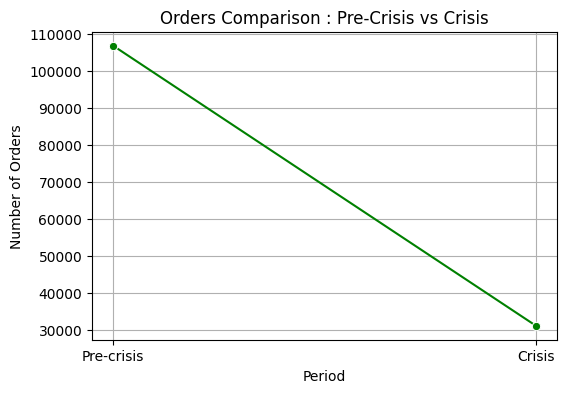

In [32]:
# Now, plot the line graph for the pre-crisis and crisis resp orders
plt.figure(figsize = (6,4))
sns.lineplot(data = months_period_orders, x = "month_period", y = "order_id", marker = "o", color = "green")
plt.title("Orders Comparison : Pre-Crisis vs Crisis")
plt.xlabel("Period")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

In [33]:
print(f"The decline from pre-crisis to crisis is : ") 
print(months_period_orders[months_period_orders["month_period"] == "Pre-crisis"]["order_id"].sum() \
    - months_period_orders[months_period_orders["month_period"] == "Crisis"]["order_id"].sum(), "\t |  Decline :", \
     round(((months_period_orders[months_period_orders["month_period"] == "Pre-crisis"]["order_id"].sum() \
       - months_period_orders[months_period_orders["month_period"] == "Crisis"]["order_id"].sum()) / \
      months_period_orders[months_period_orders["month_period"] == "Pre-crisis"]["order_id"].sum()) * 100, 2), "%")

The decline from pre-crisis to crisis is : 
75770 	 |  Decline : 70.87 %


## **Q2] Which top 5 city groups experienced the highest percentage decline in orders during the crisis period compared to the pre-crisis period?**

In [34]:
# Here, the term is "city", "orders" and "period" (crisis and pre-crisis)
# We want highest decline % in orders for precrisis and crisis period for each city
# then we will filter top 5

# we will get city from 'dim_restaurant' dataframe and orders from 'fact_orders' dataframe
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,2025-09-30 22:51:00,September,2025,Crisis
149162,ORD202509007665,CUST014106,REST04052,ID not mentioned,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,2025-09-30 22:52:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [35]:
dim_restaurants

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
...,...,...,...,...,...,...,...
19990,REST09248,Fresh Sweets Clouds,Chennai,South Indian,Restaurant,16-25,Y
19991,REST11150,Thindi Mane Express Zone,Mumbai,Fast Food,Restaurant,<=15,N
19992,REST07315,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
19993,REST16252,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [36]:
# we can merge them on "restaurant_id"
df_orders_restaurants = pd.merge(fact_orders, dim_restaurants, on = "restaurant_id")
df_orders_restaurants

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,2025-01-03 21:15:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,2025-05-11 14:14:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,2025-05-24 13:39:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,2025-07-18 22:17:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,2025-09-30 19:16:00,September,2025,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,2025-09-12 13:33:00,September,2025,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,2025-09-12 19:42:00,September,2025,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,2025-09-18 19:58:00,September,2025,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [37]:
# Now, we need to filter ""is_cancelled" == "N" as order cancelled cannot be considered
df_orders_restaurants_success = df_orders_restaurants[df_orders_restaurants["is_cancelled"] == "N"]
df_orders_restaurants_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,2025-01-03 21:15:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,2025-05-11 14:14:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,2025-05-24 13:39:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,2025-07-18 22:17:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,2025-09-30 19:16:00,September,2025,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,2025-09-12 13:33:00,September,2025,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,2025-09-12 19:42:00,September,2025,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,2025-09-18 19:58:00,September,2025,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [38]:
# Trying to see all unique cities
df_orders_restaurants_success["city"].unique()

array(['Mumbai', 'Ahmedabad', 'Bengaluru', 'Delhi', 'Chennai',
       'Hyderabad', 'Pune', 'Kolkata'], dtype=object)

In [39]:
# Now, we can group by "city", "month_period" and count of "order_id"
df_city_period_orders = df_orders_restaurants_success.groupby(["city", "month_period"])["order_id"].count().reset_index()
df_city_period_orders

,city,month_period,order_id
0,Ahmedabad,Crisis,2536
1,Ahmedabad,Pre-crisis,8786
2,Bengaluru,Crisis,7677
3,Bengaluru,Pre-crisis,26477
4,Chennai,Crisis,3041
5,Chennai,Pre-crisis,10837
6,Delhi,Crisis,4715
7,Delhi,Pre-crisis,15800
8,Hyderabad,Crisis,3155
9,Hyderabad,Pre-crisis,10842


In [40]:
# we want to see side by side view of pre-crisis and crisis for each city
# hence, we can do pivot of the table 
df_pivot_city_period_orders = df_city_period_orders.pivot(index = "city", columns = "month_period", values = "order_id")
df_pivot_city_period_orders

month_period,Crisis,Pre-crisis
city,,
Ahmedabad,2536,8786
Bengaluru,7677,26477
Chennai,3041,10837
Delhi,4715,15800
Hyderabad,3155,10842
Kolkata,2840,9856
Mumbai,4614,15823
Pune,2564,8491


**Answer**

In [41]:
# now, create pct_decline for all the cities ((pre - cri)/pre) * 100
# later, find top 5 based on that pct
df_pivot_city_period_orders["pct_decline"] = round(((df_pivot_city_period_orders["Pre-crisis"] - df_pivot_city_period_orders["Crisis"])\
                                              / df_pivot_city_period_orders["Pre-crisis"]) * 100, 2)
df_pivot_city_period_orders_sorted = df_pivot_city_period_orders.sort_values("pct_decline", ascending = False).head()
df_pivot_city_period_orders_sorted

month_period,Crisis,Pre-crisis,pct_decline
city,,,
Chennai,3041,10837,71.94
Kolkata,2840,9856,71.19
Ahmedabad,2536,8786,71.14
Bengaluru,7677,26477,71.01
Hyderabad,3155,10842,70.90


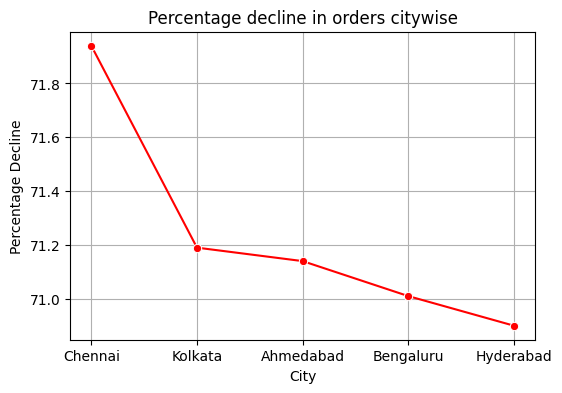

In [42]:
# plot the line chart for % decline
plt.figure(figsize = (6,4))
sns.lineplot(data = df_pivot_city_period_orders_sorted, x = "city", y = "pct_decline", marker = "o", color = "red")
plt.title("Percentage decline in orders citywise")
plt.xlabel("City")
plt.ylabel("Percentage Decline")
plt.grid(True)
plt.show()

## **Q3] Among restaurants with at least 50 pre-crisis orders, which top 10 high-volume restaurants experienced the largest percentage decline in order counts during the crisis period?**

In [43]:
# Here, the terms are "restaurants", "orders", "pre-crisis" and "crisis"
# we need to filter restaurants with atleast 50 orders in pre-crisis period
# then among these filtered restaurants, we need to find highest percentage decline in orders in crisis period
# we need top 10 restaurants by percentage decline

# we already have "restaurants" and "orders" merged as 'df_orders_restaurants_success', using that
df_orders_restaurants_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,2025-01-03 21:15:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,2025-05-11 14:14:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,2025-05-24 13:39:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,2025-07-18 22:17:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,2025-09-30 19:16:00,September,2025,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,2025-09-12 13:33:00,September,2025,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,2025-09-12 19:42:00,September,2025,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,2025-09-18 19:58:00,September,2025,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [44]:
# now, filtering only pre-crisis period
df_orders_restaurants_success_pc = df_orders_restaurants_success[df_orders_restaurants_success["month_period"] == "Pre-crisis"]
df_orders_restaurants_success_pc

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,2025-01-03 21:15:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,2025-05-11 14:14:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,2025-05-24 13:39:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
7,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149026,ORD202505000359,CUST149272,REST14076,DP07552,2025-05-29 14:38:00,526.14,55.28,43.91,514.77,N,...,2025-05-29 14:38:00,May,2025,Pre-crisis,Flavours of Darshini Bhojanalay,Ahmedabad,Fast Food,Restaurant,<=15,Y
149030,ORD202505008757,CUST069852,REST19475,DP12531,2025-05-29 19:48:00,262.07,0.00,35.27,297.34,N,...,2025-05-29 19:48:00,May,2025,Pre-crisis,Tandoori Wraps Delight,Kolkata,South Indian,Restaurant,>40,Y
149032,ORD202505014932,CUST044537,REST13190,DP11480,2025-05-30 14:55:00,459.29,75.27,32.26,416.27,Y,...,2025-05-30 14:55:00,May,2025,Pre-crisis,Thindi Mane Darshini Point,Delhi,Biryani,Restaurant,16-25,Y
149034,ORD202505018409,CUST033886,REST01980,DP11294,2025-05-30 20:02:00,223.56,34.92,40.18,228.82,Y,...,2025-05-30 20:02:00,May,2025,Pre-crisis,Taste of Biryani Corner,Mumbai,Biryani,Restaurant,16-25,Y


In [45]:
# Now, group by "restaurant_name" and count of "order_id"
pc_rest_orders = df_orders_restaurants_success_pc.groupby("restaurant_name")["order_id"].count().sort_values(ascending = False).reset_index()
pc_rest_orders

,restaurant_name,order_id
0,Punjabi Express Central,80
1,Classic Tandoor Heaven,77
2,Thindi Mane Pizza Cafe,73
3,Thindi Mane Grill Darbar,69
4,Hot & Crispy Darshini Clouds,66
...,...,...
4774,Thindi Mane Thali Corner,1
4775,Kolkata Paratha Central,1
4776,Annapurna Kitchen Mahal,1
4777,Urban Thali Hub,1


In [46]:
# Now, filter atleast 50 orders by each restaurant
pc_rest_orders = pc_rest_orders[pc_rest_orders["order_id"] >= 50]
pc_rest_orders

,restaurant_name,order_id
0,Punjabi Express Central,80
1,Classic Tandoor Heaven,77
2,Thindi Mane Pizza Cafe,73
3,Thindi Mane Grill Darbar,69
4,Hot & Crispy Darshini Clouds,66
...,...,...
98,Annapurna Biryani Point,50
99,Classic Thali Palace,50
100,Sri Darshini Heaven,50
101,Sri Grill Bhojanalay,50


In [47]:
# Now, filter the crisis period from original data
df_orders_restaurants_success_c = df_orders_restaurants_success[df_orders_restaurants_success["month_period"] == "Crisis"]
df_orders_restaurants_success_c

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,2025-07-18 22:17:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
6,ORD202508002521,CUST173787,REST08622,DP13222,2025-08-06 21:55:00,242.07,0.00,30.25,272.32,Y,...,2025-08-06 21:55:00,August,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
17,ORD202506008493,CUST033306,REST02383,DP13008,2025-06-19 22:10:00,244.17,26.99,40.33,257.51,N,...,2025-06-19 22:10:00,June,2025,Crisis,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
18,ORD202509005623,CUST183773,REST02383,DP06928,2025-09-13 22:27:00,466.02,0.00,20.92,486.93,N,...,2025-09-13 22:27:00,September,2025,Crisis,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
25,ORD202508001770,CUST104037,REST14069,DP10826,2025-08-07 14:17:00,456.51,0.00,27.56,484.07,Y,...,2025-08-07 14:17:00,August,2025,Crisis,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,2025-09-30 19:16:00,September,2025,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,2025-09-12 13:33:00,September,2025,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,2025-09-12 19:42:00,September,2025,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,2025-09-18 19:58:00,September,2025,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [48]:
# group by "restaurant_name" and count of "order_id"
c_rest_orders = df_orders_restaurants_success_c.groupby("restaurant_name")["order_id"].count().sort_values(ascending = False).reset_index()
c_rest_orders

,restaurant_name,order_id
0,Hot & Crispy Biryani Heaven,29
1,Hot & Crispy Kitchen Clouds,27
2,Hot & Crispy Express Corner,25
3,Spicy Curry Zone,24
4,Thindi Mane Paratha Zone,23
...,...,...
4672,Thindi Mane Wraps Bhojanalay,1
4673,Bombay Mess Stop,1
4674,Delhi Pizza Clouds,1
4675,Thindi Mane Thali Point,1


In [49]:
# now, since we need all the restaurants from precrisis and matching restaurants from crisis for pct decline, we need to perform left join
# left join 'pc_rest_orders' with 'c_rest_orders' on "restaurant_name"
pc50_rest_pc_c = pd.merge(pc_rest_orders, c_rest_orders, on = "restaurant_name", how = "left")

# renaming the columns for Pre-crisis and crisis respectively
pc50_rest_pc_c.rename(columns = {"order_id_x" : "Pre-crisis", "order_id_y" : "Crisis"}, inplace = True)
pc50_rest_pc_c 

,restaurant_name,Pre-crisis,Crisis
0,Punjabi Express Central,80,22
1,Classic Tandoor Heaven,77,17
2,Thindi Mane Pizza Cafe,73,21
3,Thindi Mane Grill Darbar,69,20
4,Hot & Crispy Darshini Clouds,66,15
...,...,...,...
98,Annapurna Biryani Point,50,10
99,Classic Thali Palace,50,10
100,Sri Darshini Heaven,50,13
101,Sri Grill Bhojanalay,50,15


In [50]:
# now, finding pct decline 
pc50_rest_pc_c["pct_decline"] = round(((pc50_rest_pc_c["Pre-crisis"] - pc50_rest_pc_c["Crisis"]) / pc50_rest_pc_c["Pre-crisis"]) * 100, 2)

**Answer**

In [51]:
pc50_rest_pc_c = pc50_rest_pc_c.sort_values(by = "pct_decline", ascending = False)

# we need top 10 restaurants
pc50_rest_pc_c.head(10)

,restaurant_name,Pre-crisis,Crisis,pct_decline
45,Fresh Tandoor Delight,54,4,92.59
5,Urban Kitchen Zone,63,8,87.30
6,Flavours of Tandoor Central,62,9,85.48
41,Classic Sweets Heaven,55,8,85.45
17,Grand Cafe Clouds,60,9,85.00
30,Hot & Crispy Mess Mahal,56,9,83.93
28,Punjabi Sweets Cafe,56,9,83.93
52,Thindi Mane Darshini Heaven,53,9,83.02
53,Punjabi Curry Delight,53,9,83.02
79,Spicy Thali Cafe,51,9,82.35


C:\Users\ojash\AppData\Local\Temp\ipykernel_29852\3980041385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "pct_decline", y = "restaurant_name", data = pc50_rest_pc_c.head(10), palette = "coolwarm")


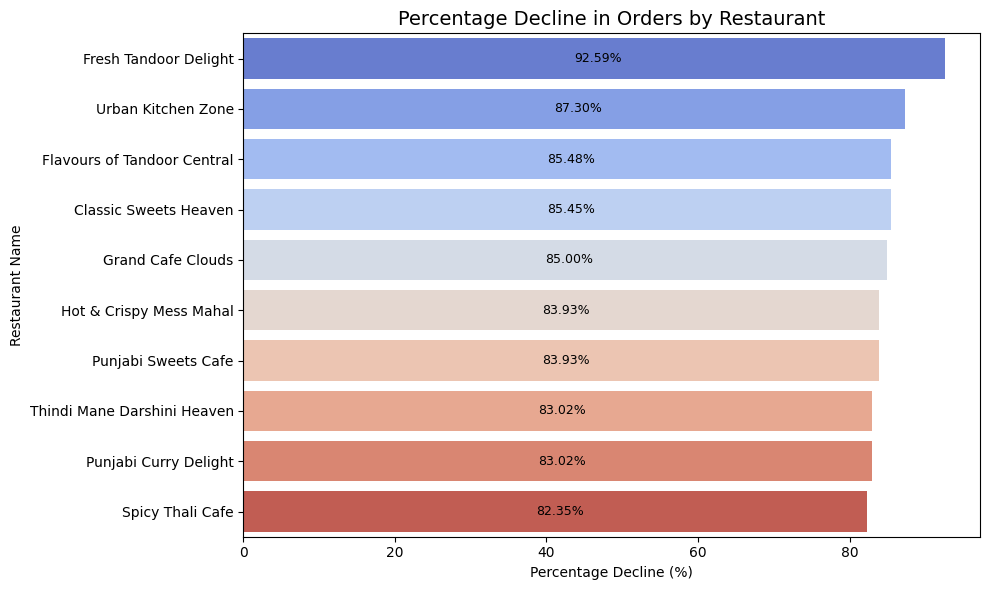

In [52]:
# plot the bar chart for % decline
plt.figure(figsize = (10,6))
ax = sns.barplot(x = "pct_decline", y = "restaurant_name", data = pc50_rest_pc_c.head(10), palette = "coolwarm")

# datalabels
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%", label_type = "center", padding = 3, fontsize = 9, color = "black")
    
plt.title("Percentage Decline in Orders by Restaurant", fontsize = 14)
plt.xlabel("Percentage Decline (%)")
plt.ylabel("Restaurant Name")
plt.tight_layout()
plt.show()

## **Q4] Cancellation Analysis: What is the cancellation rate trend pre-crisis vs crisis, and which cities are most affected?**

In [53]:
# the terms here are "cancellation", "precrisis", "crisis" and "cities"
# We need to find all cancelled orders and total orders for precrisis and crisis by cities
# then, we need to find cancellation rate (cancelled_orders / total_orders) * 100 
# give cities that have highest cancellation rate
# we are assuming top 5 cities

# first, we already have a merged table of restaurants and orders as 'df_orders_restaurants'
df_orders_restaurants

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,2025-01-03 21:15:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,2025-05-11 14:14:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,2025-05-24 13:39:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,2025-07-18 22:17:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,2025-09-30 19:16:00,September,2025,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,2025-09-12 13:33:00,September,2025,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,2025-09-12 19:42:00,September,2025,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,2025-09-18 19:58:00,September,2025,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [54]:
# filter "month_period" == "Pre-crisis"
# find total orders (success + cancelled) group by city

# filter "month_period" == "Crisis"
# find total orders (success + cancelled) group by city


In [55]:
# filter "is_cancelled" == "Y"

# filter "month_period" == "Crisis"
# find total cancelled orders for cisis group by city

# filter "month_period" == "Pre-crisis"
# find total cancelled orders for precrisis group by city

In [56]:
# filtering only "month_period" == "Pre-crisis"
df_orders_restaurants_pc = df_orders_restaurants[df_orders_restaurants["month_period"] == "Pre-crisis"]
df_orders_restaurants_pc

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,2025-01-03 21:15:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,2025-05-11 14:14:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,2025-05-24 13:39:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
7,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149026,ORD202505000359,CUST149272,REST14076,DP07552,2025-05-29 14:38:00,526.14,55.28,43.91,514.77,N,...,2025-05-29 14:38:00,May,2025,Pre-crisis,Flavours of Darshini Bhojanalay,Ahmedabad,Fast Food,Restaurant,<=15,Y
149030,ORD202505008757,CUST069852,REST19475,DP12531,2025-05-29 19:48:00,262.07,0.00,35.27,297.34,N,...,2025-05-29 19:48:00,May,2025,Pre-crisis,Tandoori Wraps Delight,Kolkata,South Indian,Restaurant,>40,Y
149032,ORD202505014932,CUST044537,REST13190,DP11480,2025-05-30 14:55:00,459.29,75.27,32.26,416.27,Y,...,2025-05-30 14:55:00,May,2025,Pre-crisis,Thindi Mane Darshini Point,Delhi,Biryani,Restaurant,16-25,Y
149034,ORD202505018409,CUST033886,REST01980,DP11294,2025-05-30 20:02:00,223.56,34.92,40.18,228.82,Y,...,2025-05-30 20:02:00,May,2025,Pre-crisis,Taste of Biryani Corner,Mumbai,Biryani,Restaurant,16-25,Y


In [57]:
# count of order_id (success + cancelled) group by city
df_city_orders_pc = df_orders_restaurants_pc.groupby("city")["order_id"].count().reset_index()
df_city_orders_pc

,city,order_id
0,Ahmedabad,9355
1,Bengaluru,28219
2,Chennai,11537
3,Delhi,16837
4,Hyderabad,11546
5,Kolkata,10470
6,Mumbai,16809
7,Pune,9033


In [58]:
# Now, filtering only "month_period" == "Crisis"
df_orders_restaurants_c = df_orders_restaurants[df_orders_restaurants["month_period"] == "Crisis"]
df_orders_restaurants_c

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,2025-07-18 22:17:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
5,ORD202507006888,CUST079945,REST08622,DP03106,2025-07-30 14:58:00,0.00,0.00,0.00,0.00,N,...,2025-07-30 14:58:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
6,ORD202508002521,CUST173787,REST08622,DP13222,2025-08-06 21:55:00,242.07,0.00,30.25,272.32,Y,...,2025-08-06 21:55:00,August,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
17,ORD202506008493,CUST033306,REST02383,DP13008,2025-06-19 22:10:00,244.17,26.99,40.33,257.51,N,...,2025-06-19 22:10:00,June,2025,Crisis,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
18,ORD202509005623,CUST183773,REST02383,DP06928,2025-09-13 22:27:00,466.02,0.00,20.92,486.93,N,...,2025-09-13 22:27:00,September,2025,Crisis,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,2025-09-30 19:16:00,September,2025,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,2025-09-12 13:33:00,September,2025,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,2025-09-12 19:42:00,September,2025,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,2025-09-18 19:58:00,September,2025,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [59]:
# count of order_id (success + cancelled) group by city
df_city_orders_c = df_orders_restaurants_c.groupby("city")["order_id"].count().reset_index()
df_city_orders_c

,city,order_id
0,Ahmedabad,2916
1,Bengaluru,8700
2,Chennai,3463
3,Delhi,5301
4,Hyderabad,3589
5,Kolkata,3226
6,Mumbai,5264
7,Pune,2901


In [60]:
# merging both the tables as we need total precrisis and crisis orders
city_orders_pc_c = pd.merge(df_city_orders_pc, df_city_orders_c, on = "city")
city_orders_pc_c.rename(columns = {"order_id_x" : "total_pc_ord", "order_id_y" : "total_c_ord"}, inplace = True)
city_orders_pc_c

,city,total_pc_ord,total_c_ord
0,Ahmedabad,9355,2916
1,Bengaluru,28219,8700
2,Chennai,11537,3463
3,Delhi,16837,5301
4,Hyderabad,11546,3589
5,Kolkata,10470,3226
6,Mumbai,16809,5264
7,Pune,9033,2901


In [61]:
# from the original dataset, now filter "is_cancelled" == "Y"
df_orders_restaurants_cancelled = df_orders_restaurants[df_orders_restaurants["is_cancelled"] == "Y"]
df_orders_restaurants_cancelled

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
5,ORD202507006888,CUST079945,REST08622,DP03106,2025-07-30 14:58:00,0.0,0.0,0.0,0.0,N,...,2025-07-30 14:58:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
40,ORD202503007550,CUST088118,REST01307,DP05974,2025-03-29 21:12:00,0.0,0.0,0.0,0.0,Y,...,2025-03-29 21:12:00,March,2025,Pre-crisis,Madras Mess Nest,Mumbai,South Indian,Restaurant,26-40,Y
86,ORD202504020268,CUST096786,REST08451,ID not mentioned,2025-04-26 21:23:00,0.0,0.0,0.0,0.0,N,...,2025-04-26 21:23:00,April,2025,Pre-crisis,Hot & Crispy Sweets Central,Hyderabad,South Indian,Restaurant,26-40,Y
104,ORD202506000371,CUST185021,REST16733,ID not mentioned,2025-06-28 14:37:00,0.0,0.0,0.0,0.0,N,...,2025-06-28 14:37:00,June,2025,Crisis,Spicy Pizza Mahal,Chennai,Pizza,Restaurant,<=15,Y
111,ORD202501009226,CUST058541,REST13916,ID not mentioned,2025-01-16 19:34:00,0.0,0.0,0.0,0.0,Y,...,2025-01-16 19:34:00,January,2025,Pre-crisis,Thindi Mane House Point,Bengaluru,Biryani,Restaurant,16-25,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149108,ORD202507009606,CUST169470,REST13918,DP08088,2025-07-11 12:25:00,0.0,0.0,0.0,0.0,N,...,2025-07-11 12:25:00,July,2025,Crisis,Bombay Biryani Mahal,Bengaluru,Chinese,Restaurant,>40,N
149136,ORD202508001285,CUST057725,REST13658,ID not mentioned,2025-08-08 19:30:00,0.0,0.0,0.0,0.0,Y,...,2025-08-08 19:30:00,August,2025,Crisis,Madras Sweets Zone,Delhi,Healthy,Cloud Kitchen,16-25,Y
149145,ORD202508005654,CUST098715,REST01337,DP10954,2025-08-13 21:42:00,0.0,0.0,0.0,0.0,Y,...,2025-08-13 21:42:00,August,2025,Crisis,Thindi Mane Tandoor Delight,Bengaluru,Fast Food,Cloud Kitchen,<=15,Y
149150,ORD202509006306,CUST193692,REST04262,ID not mentioned,2025-09-12 22:11:00,0.0,0.0,0.0,0.0,Y,...,2025-09-12 22:11:00,September,2025,Crisis,Kolkata Cafe Zone,Mumbai,Pizza,Restaurant,16-25,Y


In [62]:
# now, filter only "Pre-crisis"
df_orders_restaurants_cancelled_pc = df_orders_restaurants_cancelled[df_orders_restaurants_cancelled["month_period"] == "Pre-crisis"]
df_orders_restaurants_cancelled_pc

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
40,ORD202503007550,CUST088118,REST01307,DP05974,2025-03-29 21:12:00,0.0,0.0,0.0,0.0,Y,...,2025-03-29 21:12:00,March,2025,Pre-crisis,Madras Mess Nest,Mumbai,South Indian,Restaurant,26-40,Y
86,ORD202504020268,CUST096786,REST08451,ID not mentioned,2025-04-26 21:23:00,0.0,0.0,0.0,0.0,N,...,2025-04-26 21:23:00,April,2025,Pre-crisis,Hot & Crispy Sweets Central,Hyderabad,South Indian,Restaurant,26-40,Y
111,ORD202501009226,CUST058541,REST13916,ID not mentioned,2025-01-16 19:34:00,0.0,0.0,0.0,0.0,Y,...,2025-01-16 19:34:00,January,2025,Pre-crisis,Thindi Mane House Point,Bengaluru,Biryani,Restaurant,16-25,Y
128,ORD202501011873,CUST050526,REST19508,ID not mentioned,2025-01-01 12:10:00,0.0,0.0,0.0,0.0,N,...,2025-01-01 12:10:00,January,2025,Pre-crisis,Delhi Curry Clouds,Pune,Healthy,Cloud Kitchen,<=15,Y
145,ORD202503006024,CUST104148,REST12102,ID not mentioned,2025-03-25 12:27:00,0.0,0.0,0.0,0.0,Y,...,2025-03-25 12:27:00,March,2025,Pre-crisis,Madras Paratha Central,Pune,Chinese,Restaurant,26-40,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148868,ORD202505008752,CUST039521,REST00561,DP09493,2025-05-16 22:05:00,0.0,0.0,0.0,0.0,Y,...,2025-05-16 22:05:00,May,2025,Pre-crisis,Tandoori House Hub,Pune,North Indian,Restaurant,>40,Y
148897,ORD202505002353,CUST128358,REST01232,ID not mentioned,2025-05-21 22:56:00,0.0,0.0,0.0,0.0,N,...,2025-05-21 22:56:00,May,2025,Pre-crisis,Namma Mess Corner,Ahmedabad,North Indian,Restaurant,26-40,Y
148933,ORD202505020545,CUST017570,REST15438,DP11588,2025-05-20 19:11:00,0.0,0.0,0.0,0.0,Y,...,2025-05-20 19:11:00,May,2025,Pre-crisis,Namma Express Mahal,Bengaluru,Desserts,Restaurant,26-40,Y
148952,ORD202505012010,CUST166777,REST04130,ID not mentioned,2025-05-22 14:04:00,0.0,0.0,0.0,0.0,N,...,2025-05-22 14:04:00,May,2025,Pre-crisis,Flavours of Thali Cafe,Mumbai,Chinese,Cloud Kitchen,<=15,Y


In [63]:
# now, group by city and count of order_id
df_city_can_orders_pc = df_orders_restaurants_cancelled_pc.groupby("city")["order_id"].count().reset_index()
df_city_can_orders_pc

,city,order_id
0,Ahmedabad,569
1,Bengaluru,1742
2,Chennai,700
3,Delhi,1037
4,Hyderabad,704
5,Kolkata,614
6,Mumbai,986
7,Pune,542


In [64]:
# now, filter only "Crisis"
df_orders_restaurants_cancelled_c = df_orders_restaurants_cancelled[df_orders_restaurants_cancelled["month_period"] == "Crisis"]
df_orders_restaurants_cancelled_c

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
5,ORD202507006888,CUST079945,REST08622,DP03106,2025-07-30 14:58:00,0.0,0.0,0.0,0.0,N,...,2025-07-30 14:58:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
104,ORD202506000371,CUST185021,REST16733,ID not mentioned,2025-06-28 14:37:00,0.0,0.0,0.0,0.0,N,...,2025-06-28 14:37:00,June,2025,Crisis,Spicy Pizza Mahal,Chennai,Pizza,Restaurant,<=15,Y
127,ORD202506004016,CUST133474,REST09262,ID not mentioned,2025-06-26 14:28:00,0.0,0.0,0.0,0.0,N,...,2025-06-26 14:28:00,June,2025,Crisis,Delhi House Corner,Hyderabad,Healthy,Restaurant,<=15,Y
214,ORD202508005064,CUST041814,REST18854,DP02143,2025-08-17 13:19:00,0.0,0.0,0.0,0.0,N,...,2025-08-17 13:19:00,August,2025,Crisis,Tandoori Wraps Delight,Kolkata,South Indian,Cloud Kitchen,<=15,Y
268,ORD202506008487,CUST127001,REST16310,ID not mentioned,2025-06-26 19:37:00,0.0,0.0,0.0,0.0,N,...,2025-06-26 19:37:00,June,2025,Crisis,Bombay Sweets Delight,Mumbai,Chinese,Restaurant,<=15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149108,ORD202507009606,CUST169470,REST13918,DP08088,2025-07-11 12:25:00,0.0,0.0,0.0,0.0,N,...,2025-07-11 12:25:00,July,2025,Crisis,Bombay Biryani Mahal,Bengaluru,Chinese,Restaurant,>40,N
149136,ORD202508001285,CUST057725,REST13658,ID not mentioned,2025-08-08 19:30:00,0.0,0.0,0.0,0.0,Y,...,2025-08-08 19:30:00,August,2025,Crisis,Madras Sweets Zone,Delhi,Healthy,Cloud Kitchen,16-25,Y
149145,ORD202508005654,CUST098715,REST01337,DP10954,2025-08-13 21:42:00,0.0,0.0,0.0,0.0,Y,...,2025-08-13 21:42:00,August,2025,Crisis,Thindi Mane Tandoor Delight,Bengaluru,Fast Food,Cloud Kitchen,<=15,Y
149150,ORD202509006306,CUST193692,REST04262,ID not mentioned,2025-09-12 22:11:00,0.0,0.0,0.0,0.0,Y,...,2025-09-12 22:11:00,September,2025,Crisis,Kolkata Cafe Zone,Mumbai,Pizza,Restaurant,16-25,Y


In [65]:
# now, group by city and count of order_id
df_city_can_orders_c = df_orders_restaurants_cancelled_c.groupby("city")["order_id"].count().reset_index()
df_city_can_orders_c

,city,order_id
0,Ahmedabad,380
1,Bengaluru,1023
2,Chennai,422
3,Delhi,586
4,Hyderabad,434
5,Kolkata,386
6,Mumbai,650
7,Pune,337


In [66]:
# merging both the tables 'df_city_can_orders_pc' and 'df_city_can_orders_c' on "city"
df_city_can_orders_pc_c = pd.merge(df_city_can_orders_pc, df_city_can_orders_c, on = "city")
df_city_can_orders_pc_c.rename(columns = {"order_id_x" : "can_pc_ord", "order_id_y" : "can_c_ord"}, inplace = True)
df_city_can_orders_pc_c

,city,can_pc_ord,can_c_ord
0,Ahmedabad,569,380
1,Bengaluru,1742,1023
2,Chennai,700,422
3,Delhi,1037,586
4,Hyderabad,704,434
5,Kolkata,614,386
6,Mumbai,986,650
7,Pune,542,337


In [67]:
# Now, merge this 'df_city_can_orders_pc_c' with 'city_orders_pc_c' on "city"
city_pc_c_can_tot = pd.merge(df_city_can_orders_pc_c, city_orders_pc_c, on = "city")
city_pc_c_can_tot

,city,can_pc_ord,can_c_ord,total_pc_ord,total_c_ord
0,Ahmedabad,569,380,9355,2916
1,Bengaluru,1742,1023,28219,8700
2,Chennai,700,422,11537,3463
3,Delhi,1037,586,16837,5301
4,Hyderabad,704,434,11546,3589
5,Kolkata,614,386,10470,3226
6,Mumbai,986,650,16809,5264
7,Pune,542,337,9033,2901


In [68]:
# Now, find cancellation rate of all cities for both precrisis and crisis period (cancelled_orders / total_orders) * 100 
city_pc_c_can_tot["pc_can_%"] = round(((city_pc_c_can_tot["can_pc_ord"] / city_pc_c_can_tot["total_pc_ord"]) * 100), 2)
city_pc_c_can_tot["c_can_%"] = round(((city_pc_c_can_tot["can_c_ord"] / city_pc_c_can_tot["total_c_ord"]) * 100), 2)
city_pc_c_can_tot

,city,can_pc_ord,can_c_ord,total_pc_ord,total_c_ord,pc_can_%,c_can_%
0,Ahmedabad,569,380,9355,2916,6.08,13.03
1,Bengaluru,1742,1023,28219,8700,6.17,11.76
2,Chennai,700,422,11537,3463,6.07,12.19
3,Delhi,1037,586,16837,5301,6.16,11.05
4,Hyderabad,704,434,11546,3589,6.10,12.09
5,Kolkata,614,386,10470,3226,5.86,11.97
6,Mumbai,986,650,16809,5264,5.87,12.35
7,Pune,542,337,9033,2901,6.00,11.62


**Answer**

In [69]:
# Now, we will find the difference between "pc_can_%" and "c_can_%"
# Based on highest difference, we are selecting top 5 cities
city_pc_c_can_tot["%_diff_c-pc"] = city_pc_c_can_tot["c_can_%"] - city_pc_c_can_tot["pc_can_%"]
city_pc_c_can_tot_5 = city_pc_c_can_tot.sort_values(by = "%_diff_c-pc", ascending = False).head()
city_pc_c_can_tot_5

,city,can_pc_ord,can_c_ord,total_pc_ord,total_c_ord,pc_can_%,c_can_%,%_diff_c-pc
0,Ahmedabad,569,380,9355,2916,6.08,13.03,6.95
6,Mumbai,986,650,16809,5264,5.87,12.35,6.48
2,Chennai,700,422,11537,3463,6.07,12.19,6.12
5,Kolkata,614,386,10470,3226,5.86,11.97,6.11
4,Hyderabad,704,434,11546,3589,6.10,12.09,5.99


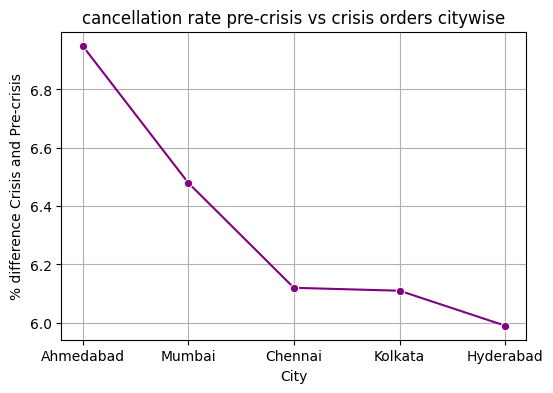

In [70]:
# plot the line chart for % difference
plt.figure(figsize = (6,4))
sns.lineplot(data = city_pc_c_can_tot_5, x = "city", y = "%_diff_c-pc", marker = "o", color = "purple")
plt.title("cancellation rate pre-crisis vs crisis orders citywise")
plt.xlabel("City")
plt.ylabel("% difference Crisis and Pre-crisis")
plt.grid(True)
plt.show()

## **Q5] Delivery SLA: Measure average delivery time across phases. Did SLA compliance worsen significantly in the crisis period?**

In [71]:
# Here, the terms are "delivery_time", "phases" and "crisis"
# "phases" - Pre-crisis and Crisis
# "delivery_time" is present in 'fact_delivery_performance', 
# we also need 'df_orders_restaurants' for "crisis" period

# SLA(Service Level Agreement) -> term to see if order delivered before or at expected time
fact_delivery_performance

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4
...,...,...,...,...
149161,ORD202509003524,72,46,2.2
149162,ORD202509007665,58,38,3.5
149163,ORD202509007687,49,40,6.3
149164,ORD202509002029,50,49,6.8


In [72]:
# seeing the 'df_orders_restaurants'
df_orders_restaurants

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,order_date,order_month,order_year,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,2025-01-01 12:00:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,2025-01-03 21:15:00,January,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,2025-05-11 14:14:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,2025-05-24 13:39:00,May,2025,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,2025-07-18 22:17:00,July,2025,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,2025-09-30 19:16:00,September,2025,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,2025-09-12 13:33:00,September,2025,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,2025-09-12 19:42:00,September,2025,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,2025-09-18 19:58:00,September,2025,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [73]:
 # on observing, we can see that there are all successfull order_id already present in the 'fact_delivery_performance'
# merging 'fact_delivery_performance' and 'df_orders_restaurants' on "order_id" as inner join
orders_restaurants_delivery = pd.merge(df_orders_restaurants, fact_delivery_performance, on = "order_id")
orders_restaurants_delivery

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,month_period,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,31,31,6.4
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,55,41,5.5
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,46,30,3.0
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,Pre-crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,43,41,4.2
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,Crisis,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,50,38,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,Crisis,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y,70,37,1.5
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,Crisis,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y,60,41,6.0
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,Crisis,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y,57,46,7.5
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,Crisis,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N,43,37,4.6


In [74]:
# adding a column for SLA_met (actual_delivery_time) <= (expected_delivery_time)
orders_restaurants_delivery["SLA_met"] = orders_restaurants_delivery["actual_delivery_time_mins"] <= orders_restaurants_delivery["expected_delivery_time_mins"]
orders_restaurants_delivery

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,...,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active,actual_delivery_time_mins,expected_delivery_time_mins,distance_km,SLA_met
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,...,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,31,31,6.4,True
1,ORD202501010898,CUST156566,REST08622,DP01631,2025-01-03 21:15:00,355.98,53.77,25.17,327.38,N,...,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,55,41,5.5,False
2,ORD202505023567,CUST023778,REST08622,DP08084,2025-05-11 14:14:00,273.45,0.00,41.33,314.78,Y,...,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,46,30,3.0,False
3,ORD202505020151,CUST114181,REST08622,DP12018,2025-05-24 13:39:00,393.78,0.00,42.67,436.45,Y,...,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,43,41,4.2,False
4,ORD202507004827,CUST159073,REST08622,DP08722,2025-07-18 22:17:00,287.75,0.00,41.34,329.09,N,...,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y,50,38,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509002069,CUST128441,REST07315,DP00075,2025-09-30 19:16:00,236.83,41.56,24.77,220.05,N,...,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y,70,37,1.5,False
149162,ORD202509002485,CUST082579,REST01348,DP06210,2025-09-12 13:33:00,313.50,0.00,25.83,339.33,N,...,Thindi Mane Biryani Zone,Delhi,Chinese,Restaurant,26-40,Y,60,41,6.0,False
149163,ORD202509006635,CUST135153,REST02504,DP01501,2025-09-12 19:42:00,333.94,68.03,29.40,295.32,Y,...,Taste of Tandoor Zone,Kolkata,Pizza,Restaurant,16-25,Y,57,46,7.5,False
149164,ORD202509007205,CUST011223,REST16252,DP14760,2025-09-18 19:58:00,317.92,52.06,40.01,305.86,N,...,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N,43,37,4.6,False


In [75]:
# now, group by "month_period" and mean of "actual_time", "expected_time" and "SLA_met" (average)
month_period_times = orders_restaurants_delivery.groupby("month_period")[["actual_delivery_time_mins", "expected_delivery_time_mins", "SLA_met"]].mean().reset_index()
month_period_times

,month_period,actual_delivery_time_mins,expected_delivery_time_mins,SLA_met
0,Crisis,60.117647,42.517223,0.122031
1,Pre-crisis,39.522424,37.503067,0.436049


In [76]:
# Converting the "SLA_met" to percentage
month_period_times.rename(columns = {"SLA_met" : "SLA_met_%"}, inplace = True)
month_period_times["SLA_met_%"] = month_period_times["SLA_met_%"] * 100
month_period_times

,month_period,actual_delivery_time_mins,expected_delivery_time_mins,SLA_met_%
0,Crisis,60.117647,42.517223,12.203054
1,Pre-crisis,39.522424,37.503067,43.604907


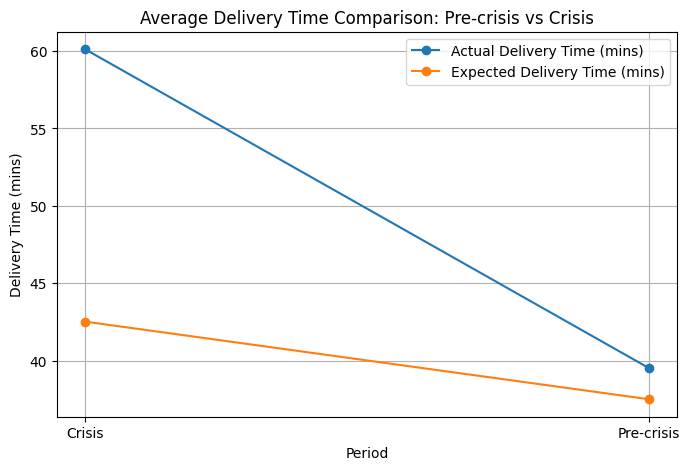

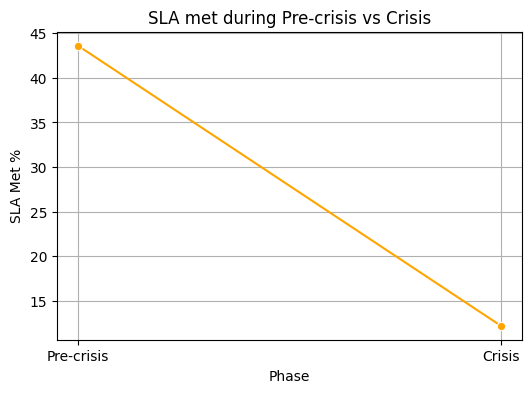

In [77]:
# plot the line chart for phase and both time periods
plt.figure(figsize=(8,5))

plt.plot(month_period_times["month_period"], month_period_times["actual_delivery_time_mins"], 
         marker = "o", label = "Actual Delivery Time (mins)")
plt.plot(month_period_times["month_period"], month_period_times["expected_delivery_time_mins"], 
         marker = "o", label = "Expected Delivery Time (mins)")

plt.title("Average Delivery Time Comparison: Pre-crisis vs Crisis")
plt.xlabel("Period")
plt.ylabel("Delivery Time (mins)")
plt.legend()
plt.grid(True)
plt.show()


# plot the line chart for % of SLA met 
plt.figure(figsize = (6,4))
sns.lineplot(data = month_period_times.sort_values(by = "SLA_met_%", ascending = False), x = "month_period", y = "SLA_met_%", marker = "o", color = "orange")
plt.title("SLA met during Pre-crisis vs Crisis")
plt.xlabel("Phase")
plt.ylabel("SLA Met %")
plt.grid(True)
plt.show()

SLA has worsened in Crisis Period

## **Q6] Ratings Fluctuation: Track average customer rating month-by-month. Which months saw the sharpest drop?**

In [78]:
# Here, the terms are "customer rating" and "month"
# we have both these terms in 'fact_ratings' table
# we have to take average of ratings group by month
fact_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00,2025-01-01 14:03:00,January,2025
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50,2025-01-01 14:06:00,January,2025
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70,2025-01-01 14:06:00,January,2025
...,...,...,...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40,2025-09-30 23:40:00,September,2025
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30,2025-09-30 23:41:00,September,2025
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90,2025-09-30 23:43:00,September,2025
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45,2025-09-30 23:57:00,September,2025


In [79]:
# we can group by month name mean of rating
month_avg_ratings = fact_ratings.groupby("order_month")["rating"].mean().reset_index()
month_avg_ratings["rating"] = round(month_avg_ratings["rating"], 2)
month_avg_ratings

,order_month,rating
0,April,4.30
1,August,2.40
2,February,4.40
3,January,4.58
4,July,2.69
5,June,2.63
6,March,4.74
7,May,4.49
8,September,2.31


In [80]:
# Writing all the months in order so that we can later sort the months in order
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September"]

In [81]:
# sorting the months using categorical function in pandas
month_avg_ratings["order_month"] = pd.Categorical(month_avg_ratings["order_month"], categories = months, ordered = True)
month_avg_ratings = month_avg_ratings.sort_values("order_month")

**Answer**

In [82]:
# now, we need to find the difference between ratings of months wether it has dropped or increased from previous months 
# we can use diff() function
month_avg_ratings["prev_month_change"] = month_avg_ratings["rating"].diff()
month_avg_ratings

,order_month,rating,prev_month_change
3,January,4.58,NaN
2,February,4.40,-0.18
6,March,4.74,0.34
0,April,4.30,-0.44
7,May,4.49,0.19
5,June,2.63,-1.86
4,July,2.69,0.06
1,August,2.40,-0.29
8,September,2.31,-0.09


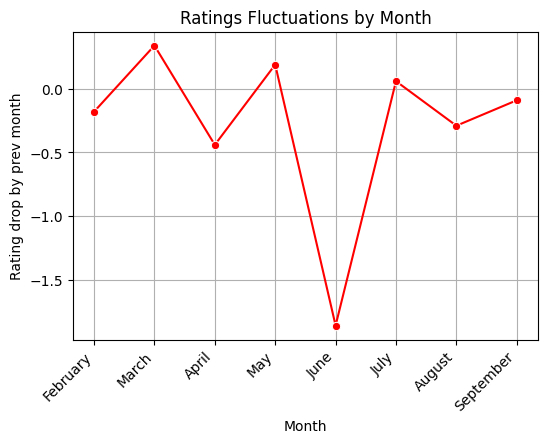

In [83]:
# plot the line chart for the difference
plt.figure(figsize = (6,4))
sns.lineplot(data = month_avg_ratings, x = "order_month", y = "prev_month_change", marker = "o", color = "red")
plt.title("Ratings Fluctuations by Month")
plt.xlabel("Month")
plt.ylabel("Rating drop by prev month")
plt.xticks(rotation = 45, ha = "right")
plt.grid(True)
plt.show()

June has the sharpest drop of rating (Crisis period)

## **Q7] Sentiment Insights: During the crisis period, identify the most frequently occurring negative keywords in customer review texts.**

In [84]:
# Here, the terms are "crisis" and "review" (customer feedbacks)
# We have to find most occuring negative keywords in reviews
# we will be needing "NLP" libraries to deal with this
# we can get the reviews from 'fact_ratings' dataset
fact_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00,2025-01-01 14:03:00,January,2025
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50,2025-01-01 14:06:00,January,2025
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70,2025-01-01 14:06:00,January,2025
...,...,...,...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40,2025-09-30 23:40:00,September,2025
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30,2025-09-30 23:41:00,September,2025
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90,2025-09-30 23:43:00,September,2025
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45,2025-09-30 23:57:00,September,2025


In [85]:
# we also need "Crisis" period, hence adding this missing column in this dataset
fact_ratings["month_period"] = fact_ratings["order_month"].map(months_period)
fact_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025,Pre-crisis
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025,Pre-crisis
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00,2025-01-01 14:03:00,January,2025,Pre-crisis
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50,2025-01-01 14:06:00,January,2025,Pre-crisis
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70,2025-01-01 14:06:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40,2025-09-30 23:40:00,September,2025,Crisis
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30,2025-09-30 23:41:00,September,2025,Crisis
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90,2025-09-30 23:43:00,September,2025,Crisis
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45,2025-09-30 23:57:00,September,2025,Crisis


In [86]:
# Now, filter only "Crisis" period
fact_ratings_c = fact_ratings[fact_ratings["month_period"] == "Crisis"]
fact_ratings_c

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year,month_period
53218,ORD202505013659,CUST080305,REST07502,4.2,Okay experience,01-06-2025 00:00,0.60,2025-06-01 00:00:00,June,2025,Crisis
53222,ORD202505008113,CUST148892,REST15440,5.0,Excellent service,01-06-2025 00:04,1.00,2025-06-01 00:04:00,June,2025,Crisis
53226,ORD202505002279,CUST042121,REST15528,4.5,Excellent service,01-06-2025 00:07,0.75,2025-06-01 00:07:00,June,2025,Crisis
53229,ORD202505023917,CUST172237,REST07035,4.2,Tasty but a bit late,01-06-2025 00:08,0.60,2025-06-01 00:08:00,June,2025,Crisis
53230,ORD202505018188,CUST112653,REST10715,4.9,Great taste!,01-06-2025 00:08,0.95,2025-06-01 00:08:00,June,2025,Crisis
...,...,...,...,...,...,...,...,...,...,...,...
68820,ORD202509009609,CUST057825,REST01490,2.2,Stale food served,30-09-2025 23:40,-0.40,2025-09-30 23:40:00,September,2025,Crisis
68821,ORD202509004269,CUST114184,REST16601,3.6,Could be hotter,30-09-2025 23:41,0.30,2025-09-30 23:41:00,September,2025,Crisis
68822,ORD202509006794,CUST173128,REST11207,1.2,Horrible service,30-09-2025 23:43,-0.90,2025-09-30 23:43:00,September,2025,Crisis
68823,ORD202509008376,CUST135098,REST05223,2.1,Packaging issue,30-09-2025 23:57,-0.45,2025-09-30 23:57:00,September,2025,Crisis


In [87]:
# we already have "Crisis" data now, just need only reviews column from that
reviews = fact_ratings_c[["review_text"]]
reviews

,review_text
53218,Okay experience
53222,Excellent service
53226,Excellent service
53229,Tasty but a bit late
53230,Great taste!
...,...
68820,Stale food served
68821,Could be hotter
68822,Horrible service
68823,Packaging issue


In [88]:
# We have all the reviews from "Crisis" period
# now, we need nlp libraries

# "nltk" - toolkit to analyze textual data 
import nltk

# "VADER" - A pre-trained sentiment analysis model of NLTK, SentimentIntensityAnalyzer is a tool in NLTK’s VADER module for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# "Counter" - to count the occurrences of each word
from collections import Counter

# "re" - to clean the text
import re

In [89]:
# imp - download "vader_lexicon"
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ojash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [90]:
# initalize the analyzer
sia = SentimentIntensityAnalyzer()

In [91]:
# function to clean text and extract negative keywords
def clean_extract_text(text):
    # remove everything except text and spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())
    # seperate all words from this text
    words = text.split()
    # create a empty list for storing negative keywords later
    negative_words = []

    # calculate score for each word and find all negative words based on score 
    for word in words:
        score = sia.polarity_scores(word)["compound"]
        # if score is less than equal to -0.03, append that word to negative keywords 
        if score <= -0.03:                     # >= +0.05 : positive | <= −0.05 : Negative sentiment | between −0.05 and +0.05 : Neutral sentiment
            negative_words.append(word)
    return negative_words

In [92]:
# apply this function to all the reviews
reviews["negative_words"] = reviews["review_text"].apply(clean_extract_text)

C:\Users\ojash\AppData\Local\Temp\ipykernel_29852\1139040348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["negative_words"] = reviews["review_text"].apply(clean_extract_text)


In [93]:
reviews

,review_text,negative_words
53218,Okay experience,[]
53222,Excellent service,[]
53226,Excellent service,[]
53229,Tasty but a bit late,[]
53230,Great taste!,[]
...,...,...
68820,Stale food served,[]
68821,Could be hotter,[]
68822,Horrible service,[horrible]
68823,Packaging issue,[]


In [94]:
# since we now have list of words, we need to flatten it
all_negative_words = [word for sublist in reviews["negative_words"] for word in sublist]

In [95]:
all_negative_words

['worst',
 'terrible',
 'bad',
 'poor',
 'bad',
 'poor',
 'bad',
 'bad',
 'bad',
 'bad',
 'horrible',
 'bad',
 'bad',
 'bad',
 'terrible',
 'poor',
 'bad',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'bad',
 'bad',
 'poor',
 'bad',
 'bad',
 'terrible',
 'poor',
 'worst',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'bad',
 'bad',
 'worst',
 'poor',
 'poor',
 'bad',
 'poor',
 'worst',
 'poor',
 'poor',
 'bad',
 'poor',
 'bad',
 'bad',
 'poor',
 'poor',
 'bad',
 'bad',
 'bad',
 'bad',
 'bad',
 'poor',
 'poor',
 'bad',
 'poor',
 'bad',
 'horrible',
 'terrible',
 'bad',
 'poor',
 'poor',
 'poor',
 'poor',
 'bad',
 'bad',
 'poor',
 'poor',
 'poor',
 'poor',
 'poor',
 'terrible',
 'poor',
 'poor',
 'poor',
 'bad',
 'poor',
 'poor',
 'poor',
 'bad',
 'poor',
 'poor',
 'poor',
 'bad',
 'poor',
 'poor',
 'poor',
 'bad',
 'terrible',
 'worst',
 'poor',
 'bad',
 'poor',
 'poor',
 'bad',
 'bad',
 'poor',
 'bad',
 'poor',
 'bad',
 'poor',
 'bad',
 'poor',
 'terrible',
 'terrible',
 'bad',
 'poor

In [96]:
# Using counter, counting all the negative words
neg_words_counter = Counter(all_negative_words)
neg_words_counter

Counter({'poor': 1001,
         'bad': 972,
         'worst': 156,
         'terrible': 131,
         'horrible': 127})

**Answer**

In [97]:
# converting this output to dataframe 
negative_words_count = pd.DataFrame.from_dict(neg_words_counter, orient = "index", columns = ["count"]).reset_index()
negative_words_count.rename(columns = {"index" : "words"}, inplace = True)
negative_words_count.sort_values(by = "count", inplace = True, ascending = False)
negative_words_count

,words,count
3,poor,1001
2,bad,972
0,worst,156
1,terrible,131
4,horrible,127


C:\Users\ojash\AppData\Local\Temp\ipykernel_29852\1247816889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "words", y = "count", data = negative_words_count, palette = "Reds_r")


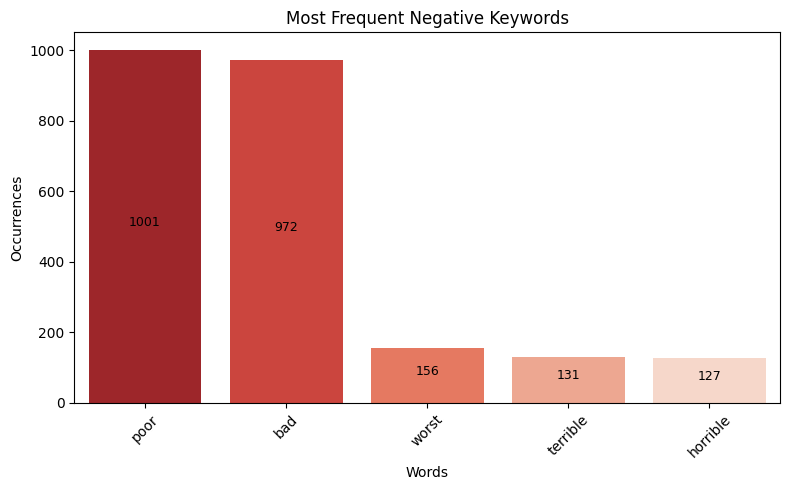

In [98]:
# plotting a bar chart for the same 

plt.figure(figsize = (8,5))
ax = sns.barplot(x = "words", y = "count", data = negative_words_count, palette = "Reds_r")
for container in ax.containers:
    ax.bar_label(container, fmt = "%d", label_type = "center", padding = 3, fontsize = 9, color = "black")
plt.title("Most Frequent Negative Keywords")
plt.xlabel("Words")
plt.ylabel("Occurrences")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## **Q8] Revenue Impact: Estimate revenue loss from pre-crisis vs crisis (based on subtotal, discount, and delivery fee)**

In [99]:
# Here, the terms are "revenue", "crisis" and "precrisis"
# we have to calculate revenue for crisis and precrisis, then we have to compare them
# revenue is based on subtotal, discount and delivery fee

# all this info is present in 
fact_orders

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149161,ORD202509003524,CUST080037,REST12269,DP13152,2025-09-30 22:51:00,0.00,0.00,0.00,0.00,N,Y,2025-09-30 22:51:00,September,2025,Crisis
149162,ORD202509007665,CUST014106,REST04052,ID not mentioned,2025-09-30 22:52:00,0.00,0.00,0.00,0.00,Y,Y,2025-09-30 22:52:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [100]:
# here, we can observe that for all the cancelled orders, there is no revenue generated which is logically correct
# still, filtering out all not cancelled orders
# we already have all non-cancelled orders as 'fact_orders_success', hence using that
fact_orders_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


**Answer**

In [101]:
# Now, we can group by "month_period" and sum of revenue
revenue_month_period = fact_orders_success.groupby("month_period")["total_amount"].sum().sort_values(ascending = False).reset_index()
revenue_month_period

,month_period,total_amount
0,Pre-crisis,37620964.25
1,Crisis,10940151.31


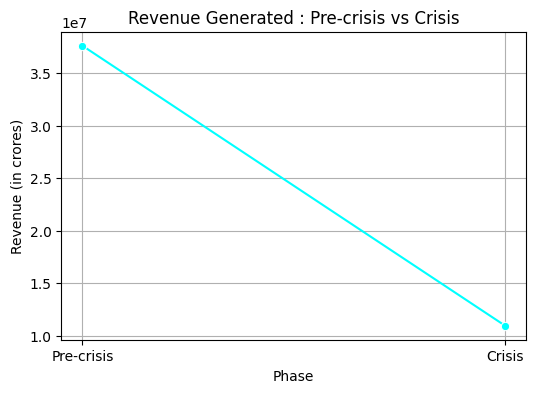

The loss of Revenue from Pre-crisis to Crisis period is : 
26680812.94 	 |  Decline : 70.92 %


In [102]:
# Now, we have the total revenue by time period, we can plot it 
plt.figure(figsize = (6,4))
sns.lineplot(data = revenue_month_period, x = "month_period", y = "total_amount", marker = "o", color = "cyan")
plt.title("Revenue Generated : Pre-crisis vs Crisis")
plt.xlabel("Phase")
plt.ylabel("Revenue (in crores)")
plt.grid(True)
plt.show()


print("The loss of Revenue from Pre-crisis to Crisis period is : ")
print(round((revenue_month_period[revenue_month_period["month_period"] == "Pre-crisis"]["total_amount"].sum()\
             - revenue_month_period[revenue_month_period["month_period"] == "Crisis"]["total_amount"].sum()), 2), "\t |  Decline :", \
     round(((revenue_month_period[revenue_month_period["month_period"] == "Pre-crisis"]["total_amount"].sum()\
      - revenue_month_period[revenue_month_period["month_period"] == "Crisis"]["total_amount"].sum())/ \
     revenue_month_period[revenue_month_period["month_period"] == "Pre-crisis"]["total_amount"].sum()) * 100, 2), "%")

## **Q9] Loyalty Impact: Among customers who placed five or more orders before the crisis, determine how many stopped ordering during the crisis, and out of those, how many had an average rating above 4.5?**

In [103]:
# Here, the terms are "customers", "orders", "crisis" and "rating"

# first, we need those customers who placed greater than or equal to 5 orders before crisis (Pre-crisis)
# among these customers, which have not ordered in crisis period (cust_id not in crisis period)
# then among the filtered customers, who has given average rating of 4.5

# we are considerng non - cancelled orders "is_cancelled" == "N" that is already done in 'fact_orders_success'
# we also have "customer_id" present in 'fact_orders_success', using it
fact_orders_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [104]:
# first, filter "Pre-crisis" period only
# then we can group by "customer_id" and count of "order_id" to get orders by customers
fact_orders_success_pc = fact_orders_success[fact_orders_success["month_period"] == "Pre-crisis"]
fact_orders_success_pc

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113801,ORD202505018863,CUST051587,REST02714,DP14838,2025-05-31 22:56:00,512.60,0.00,26.24,538.85,N,N,2025-05-31 22:56:00,May,2025,Pre-crisis
113802,ORD202505001612,CUST147595,REST16407,DP13022,2025-05-31 22:57:00,184.06,14.76,41.10,210.40,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113803,ORD202505019700,CUST154229,REST15905,DP05412,2025-05-31 22:57:00,401.05,0.00,26.53,427.58,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113804,ORD202505003563,CUST063202,REST08625,DP06918,2025-05-31 22:59:00,487.19,0.00,41.63,528.82,Y,N,2025-05-31 22:59:00,May,2025,Pre-crisis


In [105]:
# now, we can group by "customer_id" and count of "order_id" as we want customers wise orders
pc_customers_orders = fact_orders_success_pc.groupby("customer_id")["order_id"].count().sort_values(ascending = False).reset_index()
pc_customers_orders

,customer_id,order_id
0,CUST076309,6
1,CUST041121,6
2,CUST136053,5
3,CUST036233,5
4,CUST056893,5
...,...,...
82857,CUST075731,1
82858,CUST075732,1
82859,CUST075735,1
82860,CUST075737,1


In [106]:
# we want customers with 5 or more than 5 orders
pc_customers_orders = pc_customers_orders[pc_customers_orders["order_id"] >= 5]
pc_customers_orders.rename(columns = {"order_id" : "orders"}, inplace = True)
pc_customers_orders

C:\Users\ojash\AppData\Local\Temp\ipykernel_29852\3480649240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc_customers_orders.rename(columns = {"order_id" : "orders"}, inplace = True)


,customer_id,orders
0,CUST076309,6
1,CUST041121,6
2,CUST136053,5
3,CUST036233,5
4,CUST056893,5
5,CUST188511,5
6,CUST033937,5
7,CUST107785,5
8,CUST105415,5
9,CUST179266,5


In [107]:
# now, among these customers, we want to see that which have not ordered (not present) in crisis period
# hence, now we need to filter only "Crisis" period
fact_orders_success_c = fact_orders_success[fact_orders_success["month_period"] == "Crisis"]
fact_orders_success_c

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
113806,ORD202506001517,CUST193107,REST11340,DP01565,2025-06-01 12:01:00,209.14,0.00,43.26,252.40,Y,N,2025-06-01 12:01:00,June,2025,Crisis
113807,ORD202506007403,CUST123608,REST15169,DP04516,2025-06-01 12:02:00,301.46,0.00,33.28,334.74,Y,N,2025-06-01 12:02:00,June,2025,Crisis
113808,ORD202506000048,CUST058572,REST04785,DP12848,2025-06-01 12:03:00,371.01,82.34,33.15,321.82,N,N,2025-06-01 12:03:00,June,2025,Crisis
113809,ORD202506004081,CUST007063,REST02402,DP05831,2025-06-01 12:06:00,301.03,0.00,26.87,327.90,Y,N,2025-06-01 12:06:00,June,2025,Crisis
113810,ORD202506003190,CUST092670,REST03484,DP12110,2025-06-01 12:11:00,291.66,0.00,20.05,311.71,N,N,2025-06-01 12:11:00,June,2025,Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [108]:
# now, we want to check customers in precrisis(ord >= 5) not in Crisis
# these will be the customers that have stopped ordering in Crisis period
# we will use ~'pc_customers_orders'-> "customer_id" isin 'fact_orders_success_c'-> "customer_id"
# this says that customers in precrisis that are not in crisis period
stopped_customers_c = pc_customers_orders[~pc_customers_orders["customer_id"].isin(fact_orders_success_c["customer_id"])]
stopped_customers_c

,customer_id,orders
1,CUST041121,6
3,CUST036233,5
4,CUST056893,5
5,CUST188511,5
7,CUST107785,5
9,CUST179266,5
10,CUST076253,5
11,CUST062877,5
12,CUST014076,5
13,CUST144684,5


In [109]:
# theses are the customers that have ordered in precrisis but not ordered in crisis
# now, we need to join 'stopped_customers_c' with 'fact_ratings' as left join -> we want to show all stopped customer details in ratings table
stopped_customers_ratings = pd.merge(stopped_customers_c, fact_ratings, how = "left", on = "customer_id")
stopped_customers_ratings

,customer_id,orders,order_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year,month_period
0,CUST041121,6,ORD202502005558,REST01033,4.4,Good but can improve,13-02-2025 16:51,0.70,2025-02-13 16:51:00,February,2025.0,Pre-crisis
1,CUST041121,6,ORD202504007255,REST05691,4.3,Okay experience,30-04-2025 16:36,0.65,2025-04-30 16:36:00,April,2025.0,Pre-crisis
2,CUST041121,6,ORD202505024490,REST09897,3.7,Could be hotter,21-05-2025 14:37,0.35,2025-05-21 14:37:00,May,2025.0,Pre-crisis
3,CUST036233,5,ORD202503001958,REST13189,4.3,Tasty but a bit late,18-03-2025 22:59,0.65,2025-03-18 22:59:00,March,2025.0,Pre-crisis
4,CUST036233,5,ORD202505021660,REST15778,4.7,Excellent service,02-05-2025 22:28,0.85,2025-05-02 22:28:00,May,2025.0,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...
93,CUST078309,5,ORD202505004084,REST09733,4.9,Great taste!,17-05-2025 15:26,0.95,2025-05-17 15:26:00,May,2025.0,Pre-crisis
94,CUST194671,5,ORD202502016503,REST01194,4.3,Satisfied overall,12-02-2025 17:10,0.65,2025-02-12 17:10:00,February,2025.0,Pre-crisis
95,CUST192783,5,ORD202501018531,REST10838,4.5,Loved it!,18-01-2025 14:06,0.75,2025-01-18 14:06:00,January,2025.0,Pre-crisis
96,CUST192783,5,ORD202502005897,REST16976,4.2,Okay experience,19-02-2025 16:48,0.60,2025-02-19 16:48:00,February,2025.0,Pre-crisis


In [110]:
# now that we have all the customers who have not ordered in crisis period, we can group by "customer_id" and mean of "rating"
stopped_customers_avgratings = stopped_customers_ratings.groupby("customer_id")["rating"].mean().reset_index()
stopped_customers_avgratings

,customer_id,rating
0,CUST011220,4.400000
1,CUST014076,4.900000
2,CUST020252,4.250000
3,CUST032044,4.850000
4,CUST032334,5.000000
5,CUST034992,4.200000
6,CUST036233,4.500000
7,CUST041121,4.133333
8,CUST041916,4.400000
9,CUST041953,5.000000


In [111]:
# rounding the "rating" to 1 decimal
stopped_customers_avgratings["rating"] = round(stopped_customers_avgratings["rating"], 1)
stopped_customers_avgratings

,customer_id,rating
0,CUST011220,4.4
1,CUST014076,4.9
2,CUST020252,4.2
3,CUST032044,4.8
4,CUST032334,5.0
5,CUST034992,4.2
6,CUST036233,4.5
7,CUST041121,4.1
8,CUST041916,4.4
9,CUST041953,5.0


**Answer**

In [112]:
# now, we have those customers with their average rating
# next, we need only those customers whose avg_rating > 4.5
stopped_customers_avgratings = stopped_customers_avgratings[stopped_customers_avgratings["rating"] > 4.5]
stopped_customers_avgratings.rename(columns = {"rating" : "average_rating"}, inplace = True)
stopped_customers_avgratings

C:\Users\ojash\AppData\Local\Temp\ipykernel_29852\1164204838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopped_customers_avgratings.rename(columns = {"rating" : "average_rating"}, inplace = True)


,customer_id,average_rating
1,CUST014076,4.9
3,CUST032044,4.8
4,CUST032334,5.0
9,CUST041953,5.0
10,CUST042658,4.7
14,CUST069956,4.6
18,CUST078309,4.8
20,CUST082992,4.7
21,CUST083875,5.0
22,CUST086938,4.7


C:\Users\ojash\AppData\Local\Temp\ipykernel_29852\4168570977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "customer_id", y = "average_rating", data = stopped_customers_avgratings, palette = "Reds_r")


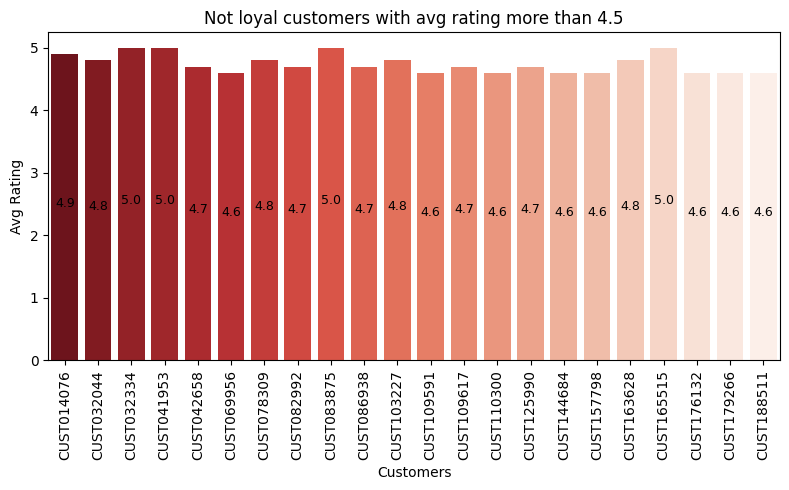

In [113]:
# plotting a bar chart for the same 
plt.figure(figsize = (8,5))
ax = sns.barplot(x = "customer_id", y = "average_rating", data = stopped_customers_avgratings, palette = "Reds_r")
for container in ax.containers:
    ax.bar_label(container, fmt = "%.1f", label_type = "center", padding = 3, fontsize = 9, color = "black")
plt.title("Not loyal customers with avg rating more than 4.5")
plt.xlabel("Customers")
plt.ylabel("Avg Rating")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## **Q10] Customer Lifetime Decline: Which high-value customers (top 5% by total spend before the crisis) showed the largest drop in order frequency and ratings during the crisis? What common patterns (e.g., location, cuisine preference, delivery delays) do they share?**

In [114]:
# here, the terms are "customers", ""total spend", "crisis", "precrisis", "orders" and "ratings"
# we want top 5 customers by total spend (revenue generated for company) in precrisis
# next, among these customers who showed largest drop in orders and ratings in crisis
# next we want to find is there any common parameters (e.g., location, cuisine preference, delivery delays) they have

# first, we need top 5 customers by revenue in precrisis period
# we can get this data from 'fact_orders_success' as to filter non-cancelled orders and it contains customers and revenue data
fact_orders_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [115]:
# first, filter month_period = "Pre-crisis"
fact_orders_success_cust_pc = fact_orders_success[fact_orders_success["month_period"] == "Pre-crisis"]
fact_orders_success_cust_pc

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113801,ORD202505018863,CUST051587,REST02714,DP14838,2025-05-31 22:56:00,512.60,0.00,26.24,538.85,N,N,2025-05-31 22:56:00,May,2025,Pre-crisis
113802,ORD202505001612,CUST147595,REST16407,DP13022,2025-05-31 22:57:00,184.06,14.76,41.10,210.40,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113803,ORD202505019700,CUST154229,REST15905,DP05412,2025-05-31 22:57:00,401.05,0.00,26.53,427.58,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113804,ORD202505003563,CUST063202,REST08625,DP06918,2025-05-31 22:59:00,487.19,0.00,41.63,528.82,Y,N,2025-05-31 22:59:00,May,2025,Pre-crisis


In [116]:
# now, in this we want customers by highest revenue
customers_revenue = fact_orders_success_cust_pc.groupby("customer_id")["total_amount"].sum().sort_values(ascending = False).reset_index().head()
customers_revenue

,customer_id,total_amount
0,CUST077722,2715.18
1,CUST179266,2404.06
2,CUST125990,2403.16
3,CUST163628,2397.58
4,CUST165515,2349.96


In [117]:
# we got our top 5 customers by spend in precrisis period
# now, from these we need to show those customers with largest drop in order frequency and ratings during the crisis
# for this, we need to find order counts and ratings for these customers in precrisis and crisis resp

In [118]:
# first, get the original 'fact_orders_success' data in which we will group by customer_id, order_period and count of orders
fact_orders_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [119]:
# grouping by customerid, monthperiod and count of orders
customers_period_orders = fact_orders_success.groupby(["customer_id", "month_period"])["order_id"].count().reset_index()
customers_period_orders

,customer_id,month_period,order_id
0,CUST000007,Pre-crisis,1
1,CUST000008,Pre-crisis,1
2,CUST000009,Crisis,2
3,CUST000009,Pre-crisis,1
4,CUST000010,Pre-crisis,3
...,...,...,...
111677,CUST199996,Pre-crisis,1
111678,CUST199997,Pre-crisis,1
111679,CUST199999,Pre-crisis,1
111680,CUST200000,Crisis,1


In [120]:
# now from these, we only want our top customers only
# hence using .isin function - show 'customers_period_orders' data which is only in 'customers_revenue'
top_customers_period_orders = customers_period_orders[customers_period_orders["customer_id"].isin(customers_revenue["customer_id"])]
top_customers_period_orders

,customer_id,month_period,order_id
43372,CUST077722,Pre-crisis,5
70440,CUST125990,Pre-crisis,5
91384,CUST163628,Pre-crisis,5
92437,CUST165515,Pre-crisis,5
100098,CUST179266,Pre-crisis,5


### Here, after grouping by phase, we can see that all our top 5 customers come under "Pre-crisis" phase only
### This gives us info that these customers have stopped ordering in "Crisis" phase

In [121]:
# checking that if these top customers are present in "Crisis" phase
# using non-cancelled orders dataset 'fact_orders_success'
fact_orders_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [122]:
# filtering "month_period" == "Crisis"
fact_orders_success_cust_c = fact_orders_success[fact_orders_success["month_period"] == "Crisis"]
fact_orders_success_cust_c

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
113806,ORD202506001517,CUST193107,REST11340,DP01565,2025-06-01 12:01:00,209.14,0.00,43.26,252.40,Y,N,2025-06-01 12:01:00,June,2025,Crisis
113807,ORD202506007403,CUST123608,REST15169,DP04516,2025-06-01 12:02:00,301.46,0.00,33.28,334.74,Y,N,2025-06-01 12:02:00,June,2025,Crisis
113808,ORD202506000048,CUST058572,REST04785,DP12848,2025-06-01 12:03:00,371.01,82.34,33.15,321.82,N,N,2025-06-01 12:03:00,June,2025,Crisis
113809,ORD202506004081,CUST007063,REST02402,DP05831,2025-06-01 12:06:00,301.03,0.00,26.87,327.90,Y,N,2025-06-01 12:06:00,June,2025,Crisis
113810,ORD202506003190,CUST092670,REST03484,DP12110,2025-06-01 12:11:00,291.66,0.00,20.05,311.71,N,N,2025-06-01 12:11:00,June,2025,Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [123]:
# These are all "Crisis" phase data 
# now, to check if our top customers exists in this crisis phase, we can use .isin function
# fact_orders_success_cust_c["customer_id"].isin(customers_revenue["customer_id"])
top_customers_period_orders_x = fact_orders_success_cust_c[fact_orders_success_cust_c["customer_id"].isin(customers_revenue["customer_id"])]
top_customers_period_orders_x

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period


### As we can see, for crisis period, these customers are not present. Hence it concludes that they have stopped ordering in crisis period

In [124]:
# to see what common these top customers share in
# using our top customers data
customers_revenue

,customer_id,total_amount
0,CUST077722,2715.18
1,CUST179266,2404.06
2,CUST125990,2403.16
3,CUST163628,2397.58
4,CUST165515,2349.96


In [125]:
# using 'dim_customers' 
dim_customers

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic
...,...,...,...,...
107771,CUST199995,19-11-2024,Delhi,Organic
107772,CUST199996,14-01-2025,Hyderabad,Social
107773,CUST199997,22-12-2024,Hyderabad,Organic
107774,CUST199999,11-05-2025,Mumbai,Organic


In [126]:
# again using .isin function because we want to see only these customers data
# dim_customers[customer_id].isin(customers_revenue[customer_id])
customer_data = dim_customers[dim_customers["customer_id"].isin(customers_revenue["customer_id"])]
customer_data

,customer_id,signup_date,city,acquisition_channel
41892,CUST077722,03-01-2025,Delhi,Organic
67947,CUST125990,25-12-2024,Chennai,Referral
88206,CUST163628,06-01-2025,Chennai,Organic
89215,CUST165515,02-01-2025,Pune,Social
96563,CUST179266,15-02-2025,Delhi,Organic


In [127]:
# now, again seeing ratings data of these customers using .isin
# fact_ratings["customer_id"].isin(customers_revenue["customer_id"])
customer_ratings = fact_ratings[fact_ratings["customer_id"].isin(customers_revenue["customer_id"])]
customer_ratings

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year,month_period
10592,ORD202501001209,CUST163628,REST14688,4.5,Super fast delivery,31-01-2025 00:33,0.75,2025-01-31 00:33:00,January,2025,Pre-crisis
12708,ORD202502015893,CUST077722,REST08893,4.4,Good but can improve,05-02-2025 16:30,0.70,2025-02-05 16:30:00,February,2025,Pre-crisis
19084,ORD202502021436,CUST163628,REST18552,5.0,Excellent service,22-02-2025 15:35,1.00,2025-02-22 15:35:00,February,2025,Pre-crisis
23140,ORD202503001682,CUST165515,REST13162,5.0,Great taste!,05-03-2025 16:05,1.00,2025-03-05 16:05:00,March,2025,Pre-crisis
23449,ORD202503004319,CUST179266,REST07169,5.0,Super fast delivery,06-03-2025 14:16,1.00,2025-03-06 14:16:00,March,2025,Pre-crisis
25121,ORD202503010475,CUST165515,REST01202,4.9,Super fast delivery,10-03-2025 23:03,0.95,2025-03-10 23:03:00,March,2025,Pre-crisis
27508,ORD202503014137,CUST163628,REST09882,4.5,Super fast delivery,17-03-2025 21:30,0.75,2025-03-17 21:30:00,March,2025,Pre-crisis
30582,ORD202503019280,CUST125990,REST00601,5.0,Super fast delivery,26-03-2025 15:22,1.00,2025-03-26 15:22:00,March,2025,Pre-crisis
30653,ORD202503024534,CUST163628,REST14343,5.0,Loved it!,26-03-2025 17:46,1.00,2025-03-26 17:46:00,March,2025,Pre-crisis
39812,ORD202504014167,CUST179266,REST12461,4.4,Good but can improve,22-04-2025 22:14,0.70,2025-04-22 22:14:00,April,2025,Pre-crisis


### Based on these top customers data,
- The top customers come primarily from **Chennai and Delhi**
- Their reviews highlights **great delivery and service**

<h1 style="font-size: 50px; text-align: center; color:red; padding:25px">Secondary Insights</h1>

### **Q3] Which strategies (cashbacks, partnerships, food safety audits) could be most effective to rebuild trust?**

QuickBite’s crisis in June 2025 was driven by two major trust-breakers:

- **Food safety violations** : hygiene & credibility issues
- **Delivery outage during monsoon** : reliability & service breakdown

#### Phase 1 : **Quick Wins**

- **Delivery assurance** : "Delivery on time is on us!"
- **Cashbacks** - Delivery offers after bad experiences
- **Hygiene Drives** : Food safety audits  

#### Phase 2 : **Trust Rebuild**

- **Partnerships** - Launch partnerships with well-known brands for trust building
- **Food safety** - Publish monthly food safety reports, analyze weaknesses
- **We heard you** - Run campaigns to analyze customer suggestions 

### **Q4] Which types of restaurants (cloud kitchens vs dine-in, small vs large brands) are most likely to churn?**

In [128]:
# seeing the 'dim_restaurants' dataset to see the partners
dim_restaurants

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y
...,...,...,...,...,...,...,...
19990,REST09248,Fresh Sweets Clouds,Chennai,South Indian,Restaurant,16-25,Y
19991,REST11150,Thindi Mane Express Zone,Mumbai,Fast Food,Restaurant,<=15,N
19992,REST07315,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y
19993,REST16252,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N


In [129]:
# checking how many restaurants and cloud kitchen are present
dim_restaurants["partner_type"].value_counts()

partner_type
Restaurant       14028
Cloud Kitchen     5967
Name: count, dtype: int64

In [130]:
# there are total 14K restaurants partners and around 6K cloud kitchen partners 

In [131]:
# we can find out how many customers placed orders in restaurants and how many in cloud kitchen
# for that we need to merge 'dim_restaurants' with 'fact_orders' as we need to consider all the orders even it got cancelled later on

In [132]:
# we can merge 'dim_restaurants' with 'fact_orders' to find where customers are ordering from most (need all the restaurants)
res_orders = pd.merge(dim_restaurants, fact_orders, on = "restaurant_id", how = "left")
res_orders

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active,order_id,customer_id,delivery_partner_id,...,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N,ORD202501006518,CUST033760,DP09615,...,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025.0,Pre-crisis
1,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N,ORD202505005544,CUST161359,DP00427,...,329.55,0.00,25.34,354.90,N,N,2025-05-02 21:09:00,May,2025.0,Pre-crisis
2,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y,ORD202501019281,CUST179306,DP02021,...,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025.0,Pre-crisis
3,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y,ORD202502008223,CUST132493,DP02500,...,418.83,0.00,42.30,461.13,N,N,2025-02-03 20:28:00,February,2025.0,Pre-crisis
4,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y,ORD202502000767,CUST140536,DP01738,...,228.28,21.36,28.39,235.30,N,N,2025-02-16 21:34:00,February,2025.0,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149173,REST11150,Thindi Mane Express Zone,Mumbai,Fast Food,Restaurant,<=15,N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
149174,REST07315,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y,ORD202509002864,CUST089788,DP03189,...,363.38,0.00,34.04,397.42,Y,N,2025-09-10 20:49:00,September,2025.0,Crisis
149175,REST07315,Delhi Cafe Heaven,Hyderabad,Biryani,Restaurant,26-40,Y,ORD202509002069,CUST128441,DP00075,...,236.83,41.56,24.77,220.05,N,N,2025-09-30 19:16:00,September,2025.0,Crisis
149176,REST16252,Taste of Wraps Cafe,Ahmedabad,South Indian,Cloud Kitchen,16-25,N,ORD202509007205,CUST011223,DP14760,...,317.92,52.06,40.01,305.86,N,N,2025-09-18 19:58:00,September,2025.0,Crisis


In [133]:
# we can just group by "partner_type" and count of customers in each type
type_customers = res_orders.groupby("partner_type")["customer_id"].count().reset_index()
type_customers.rename(columns = {"customer_id" : "customers"}, inplace = True)
type_customers

,partner_type,customers
0,Cloud Kitchen,44304
1,Restaurant,104862


Based on this, we can say that since **restaurant has more orders**, it can be most preferred partner type 

In [134]:
# we can consider "total_orders", "total_revenue" and "total_unique_customers" for each restaurant to get small and large restaurants brands
# we are only considering non-cancelled orders, hence using 'fact_orders_success' df
fact_orders_success

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [135]:
# using .agg function to do "total_orders", "total_revenue" and "total_unique_customers" for each restaurant at once
restaurant_metrics = fact_orders_success.groupby("restaurant_id").agg(total_orders = ("order_id", "count"), \
                                                total_revenue = ("total_amount", "sum"), unique_customers = ("customer_id", "count")).reset_index()
restaurant_metrics

,restaurant_id,total_orders,total_revenue,unique_customers
0,REST00001,6,2313.23,6
1,REST00002,10,3269.26,10
2,REST00003,7,2106.09,7
3,REST00004,6,1693.33,6
4,REST00005,13,5328.94,13
...,...,...,...,...
19966,REST19996,5,1839.52,5
19967,REST19997,7,3218.25,7
19968,REST19998,9,3653.25,9
19969,REST19999,6,1497.37,6


In [136]:
# now, we are considering "total_orders" as the metrics of engagement 
# we are considering top 20 restaurants with highest orders as top brands and that might last
restaurant_metrics_by_orders = restaurant_metrics.sort_values("total_orders", ascending = False).reset_index().head(20)
restaurant_metrics_by_orders.drop(columns = ["index"], inplace = True)
restaurant_metrics_by_orders

,restaurant_id,total_orders,total_revenue,unique_customers
0,REST16529,21,6689.00,21
1,REST16780,21,8318.71,21
2,REST19297,20,6346.58,20
3,REST13412,20,7184.13,20
4,REST03377,19,6354.94,19
5,REST11694,19,6529.90,19
6,REST12335,18,6224.09,18
7,REST17743,18,6831.62,18
8,REST18518,17,6288.66,17
9,REST10196,17,6176.52,17


Based on order engagement, **Large brands might not churn** 

### **Q5] Which lapsed customers (churned post-crisis) show the highest probability of returning with the right incentives?**

In [137]:
# since we dont have post-crisis data, we are considering the customers who were present in Pre-crisis but not present in crisis
# we are considering non-cancelled orders 
# lets find filter 'fact_orders_success' by month_period

# Pre-crisis period data
fact_orders_success_pc

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113801,ORD202505018863,CUST051587,REST02714,DP14838,2025-05-31 22:56:00,512.60,0.00,26.24,538.85,N,N,2025-05-31 22:56:00,May,2025,Pre-crisis
113802,ORD202505001612,CUST147595,REST16407,DP13022,2025-05-31 22:57:00,184.06,14.76,41.10,210.40,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113803,ORD202505019700,CUST154229,REST15905,DP05412,2025-05-31 22:57:00,401.05,0.00,26.53,427.58,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113804,ORD202505003563,CUST063202,REST08625,DP06918,2025-05-31 22:59:00,487.19,0.00,41.63,528.82,Y,N,2025-05-31 22:59:00,May,2025,Pre-crisis


In [138]:
fact_orders_success_pc["is_cancelled"].unique()

array(['N'], dtype=object)

In [139]:
# crisis period data
fact_orders_success_c

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
113806,ORD202506001517,CUST193107,REST11340,DP01565,2025-06-01 12:01:00,209.14,0.00,43.26,252.40,Y,N,2025-06-01 12:01:00,June,2025,Crisis
113807,ORD202506007403,CUST123608,REST15169,DP04516,2025-06-01 12:02:00,301.46,0.00,33.28,334.74,Y,N,2025-06-01 12:02:00,June,2025,Crisis
113808,ORD202506000048,CUST058572,REST04785,DP12848,2025-06-01 12:03:00,371.01,82.34,33.15,321.82,N,N,2025-06-01 12:03:00,June,2025,Crisis
113809,ORD202506004081,CUST007063,REST02402,DP05831,2025-06-01 12:06:00,301.03,0.00,26.87,327.90,Y,N,2025-06-01 12:06:00,June,2025,Crisis
113810,ORD202506003190,CUST092670,REST03484,DP12110,2025-06-01 12:11:00,291.66,0.00,20.05,311.71,N,N,2025-06-01 12:11:00,June,2025,Crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149159,ORD202509001656,CUST038524,REST01970,DP03185,2025-09-30 22:45:00,228.01,0.00,37.21,265.22,N,N,2025-09-30 22:45:00,September,2025,Crisis
149160,ORD202509008087,CUST196699,REST16285,DP11448,2025-09-30 22:46:00,264.03,62.38,36.57,238.22,N,N,2025-09-30 22:46:00,September,2025,Crisis
149163,ORD202509007687,CUST181895,REST07289,DP04700,2025-09-30 22:55:00,521.08,85.35,20.67,456.40,N,N,2025-09-30 22:55:00,September,2025,Crisis
149164,ORD202509002029,CUST089114,REST18195,DP12994,2025-09-30 22:58:00,199.13,22.63,20.37,196.87,N,N,2025-09-30 22:58:00,September,2025,Crisis


In [140]:
fact_orders_success_c["is_cancelled"].unique()

array(['N'], dtype=object)

In [141]:
cust_in_pc = fact_orders_success_pc[~fact_orders_success_pc["customer_id"].isin(fact_orders_success_c["customer_id"])]
cust_in_pc

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,order_date,order_month,order_year,month_period
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,2025-01-01 12:00:00,January,2025,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,2025-01-01 12:00:00,January,2025,Pre-crisis
6,ORD202501004299,CUST107475,REST12542,DP07728,2025-01-01 12:02:00,206.41,0.00,30.62,237.03,Y,N,2025-01-01 12:02:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113801,ORD202505018863,CUST051587,REST02714,DP14838,2025-05-31 22:56:00,512.60,0.00,26.24,538.85,N,N,2025-05-31 22:56:00,May,2025,Pre-crisis
113802,ORD202505001612,CUST147595,REST16407,DP13022,2025-05-31 22:57:00,184.06,14.76,41.10,210.40,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113803,ORD202505019700,CUST154229,REST15905,DP05412,2025-05-31 22:57:00,401.05,0.00,26.53,427.58,Y,N,2025-05-31 22:57:00,May,2025,Pre-crisis
113804,ORD202505003563,CUST063202,REST08625,DP06918,2025-05-31 22:59:00,487.19,0.00,41.63,528.82,Y,N,2025-05-31 22:59:00,May,2025,Pre-crisis


In [142]:
# Now, we have all those customers who have not ordered in "Crisis" period
# now for these customers, we can find their ratings, sentiment score, etc to predict whether they can change their minds
# using .isin function to get their ratings and reviews from 'fact_ratings' 
cust_in_pc_feedback = fact_ratings[fact_ratings["customer_id"].isin(cust_in_pc["customer_id"])]
cust_in_pc_feedback

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year,month_period
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025,Pre-crisis
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00,2025-01-01 14:03:00,January,2025,Pre-crisis
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50,2025-01-01 14:06:00,January,2025,Pre-crisis
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70,2025-01-01 14:06:00,January,2025,Pre-crisis
5,ORD202501000464,CUST024044,REST16733,4.8,Loved it!,01-01-2025 14:07,0.90,2025-01-01 14:07:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...
53328,ORD202505005600,CUST195793,REST09679,4.6,Great taste!,01-06-2025 01:55,0.80,2025-06-01 01:55:00,June,2025,Crisis
53329,ORD202505010122,CUST191464,REST15654,4.4,Okay experience,01-06-2025 01:56,0.70,2025-06-01 01:56:00,June,2025,Crisis
53330,ORD202505018863,CUST051587,REST02714,4.4,Tasty but a bit late,01-06-2025 00:56,0.70,2025-06-01 00:56:00,June,2025,Crisis
53331,ORD202505001612,CUST147595,REST16407,4.0,Okay experience,01-06-2025 01:57,0.50,2025-06-01 01:57:00,June,2025,Crisis


In [143]:
# now, for these customers, we can check their ratings and sentiment score (+1 - positive | -1 - negative) 
# we are assuming that customers rating >= 4.5 and sentiment score >= 0.3 can contribute more as they are bit positive with the experience
cust_might_back = cust_in_pc_feedback[(cust_in_pc_feedback["rating"] >= 4.5) & (cust_in_pc_feedback["sentiment_score"] >= 0.3)]
cust_might_back

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score,order_date,order_month,order_year,month_period
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75,2025-01-01 15:00:00,January,2025,Pre-crisis
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00,2025-01-01 14:03:00,January,2025,Pre-crisis
5,ORD202501000464,CUST024044,REST16733,4.8,Loved it!,01-01-2025 14:07,0.90,2025-01-01 14:07:00,January,2025,Pre-crisis
6,ORD202501009188,CUST139611,REST13916,4.8,Loved it!,01-01-2025 15:07,0.90,2025-01-01 15:07:00,January,2025,Pre-crisis
7,ORD202501023625,CUST078091,REST12102,5.0,Great taste!,01-01-2025 15:11,1.00,2025-01-01 15:11:00,January,2025,Pre-crisis
...,...,...,...,...,...,...,...,...,...,...,...
53315,ORD202505002682,CUST193392,REST14160,4.6,Fresh and delicious,01-06-2025 00:32,0.80,2025-06-01 00:32:00,June,2025,Crisis
53316,ORD202505018336,CUST121887,REST14750,5.0,Fresh and delicious,01-06-2025 00:33,1.00,2025-06-01 00:33:00,June,2025,Crisis
53320,ORD202505011798,CUST068293,REST06234,4.9,Great taste!,01-06-2025 01:40,0.95,2025-06-01 01:40:00,June,2025,Crisis
53328,ORD202505005600,CUST195793,REST09679,4.6,Great taste!,01-06-2025 01:55,0.80,2025-06-01 01:55:00,June,2025,Crisis


In [144]:
cust_might_be_back = cust_might_back[["customer_id", "rating", "sentiment_score"]]
cust_might_be_back

,customer_id,rating,sentiment_score
1,CUST179306,4.5,0.75
2,CUST093042,5.0,1.00
5,CUST024044,4.8,0.90
6,CUST139611,4.8,0.90
7,CUST078091,5.0,1.00
...,...,...,...
53315,CUST193392,4.6,0.80
53316,CUST121887,5.0,1.00
53320,CUST068293,4.9,0.95
53328,CUST195793,4.6,0.80


These are the customers that have ordered in ***Pre-crisis*** but havent ordered in ***Crisis*** period.
But their *sentiments* and *ratings* are **positive**, pointing that they **had a better experience**.
These customers can be **contacted** and can be offered **discounts or coupons** for highest probability of returning